# Flipkart Product Analysis

Data source: https://www.kaggle.com/PromptCloudHQ/flipkart-products


Information of column or feature::
1. uniq_id: Unique ID given by the website [20000:unique values]
2. crawl_timestamp: The time of crawl
3. product_url: The Product URL [20000 : unique values]
4. product_name: The Product Name [12676 : unique values]
5. product_category_tree: The Product Category
6. pid: The PID [19998 : unique values]
7. retail_price: The retail Price
8. discounted_price: The Discounted Price
9. image: The Images of the product [18590 : unique values]
10. is_FK_Advantage_product: The Advantage
11. description: The Description of the page [17540 : unique values]
12. product_rating: The Product Rating
13. overall_rating: The Overall rating of the product
14. brand: The brand name
15. product_specifications: The Specification of products [18826 : unique values]

<b> Objective :</b>: Given description provided by seller,the goal is to predict the product category


# Loading the DataSet :
The data set is in  form:
1. .csv file 

In [1]:
# Importing important libraries
"Importing packages"
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import nltk
import string 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
import re 
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle 
from tqdm import tqdm
import os

from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

from sklearn.metrics import f1_score,precision_score,recall_score


# Reading Data

In [2]:
df = pd.read_csv('flipkart_com-ecommerce_sample.csv')
print('No of data point in our dataset ',df.shape)


No of data point in our dataset  (20000, 15)


In [3]:
#keeping the copy of data in other dateframe in order to check the left data after doing preprocessing
orgina_data=pd.read_csv('flipkart_com-ecommerce_sample.csv')

In [4]:
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


# Exploratory Data Analysis

In [5]:

df.describe()

,retail_price,discounted_price
count,19922.000000,19922.000000
mean,2979.206104,1973.401767
std,9009.639341,7333.586040
min,35.000000,35.000000
25%,666.000000,350.000000
50%,1040.000000,550.000000
75%,1999.000000,999.000000
max,571230.000000,571230.000000


In [6]:
#prints information about a DataFrame including the index dtype and columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  20000 non-null  object 
 1   crawl_timestamp          20000 non-null  object 
 2   product_url              20000 non-null  object 
 3   product_name             20000 non-null  object 
 4   product_category_tree    20000 non-null  object 
 5   pid                      20000 non-null  object 
 6   retail_price             19922 non-null  float64
 7   discounted_price         19922 non-null  float64
 8   image                    19997 non-null  object 
 9   is_FK_Advantage_product  20000 non-null  bool   
 10  description              19998 non-null  object 
 11  product_rating           20000 non-null  object 
 12  overall_rating           20000 non-null  object 
 13  brand                    14136 non-null  object 
 14  product_specifications

In [7]:
# Detect missing values in datasete columns
df.isnull().sum()

uniq_id                       0
crawl_timestamp               0
product_url                   0
product_name                  0
product_category_tree         0
pid                           0
retail_price                 78
discounted_price             78
image                         3
is_FK_Advantage_product       0
description                   2
product_rating                0
overall_rating                0
brand                      5864
product_specifications       14
dtype: int64

**Observation** :  We can see that  values missed in **retail_price**, **discounted_price**, **image**, **description**, **brand**, **product_specifications**

# plotting  for missing value in dataset Column

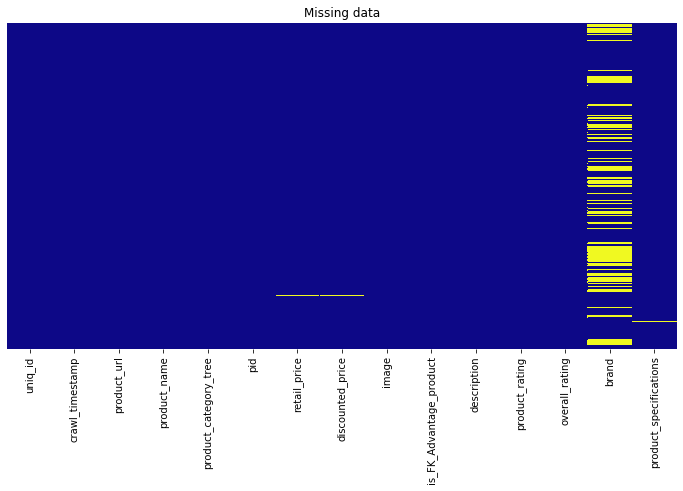

In [8]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(),cmap='plasma',yticklabels=False,cbar=False)
plt.title('Missing data')
plt.xticks()
plt.show()

In [9]:
#Checking for any duplicate values
df.duplicated().value_counts()

False    20000
dtype: int64

## retail_price,and discounted_price had some nan value, temporarily filled with mean to avoid exceptions

In [10]:
df['retail_price'].fillna(df['retail_price'].mean(),inplace=True,)

In [11]:
df.isnull().sum()

uniq_id                       0
crawl_timestamp               0
product_url                   0
product_name                  0
product_category_tree         0
pid                           0
retail_price                  0
discounted_price             78
image                         3
is_FK_Advantage_product       0
description                   2
product_rating                0
overall_rating                0
brand                      5864
product_specifications       14
dtype: int64

In [12]:
#filling missing valyes with mean of df['discounted_price']
df['discounted_price'].fillna(df['discounted_price'].mean(),inplace=True,)

In [13]:
#checking null values
df.isnull().sum()

uniq_id                       0
crawl_timestamp               0
product_url                   0
product_name                  0
product_category_tree         0
pid                           0
retail_price                  0
discounted_price              0
image                         3
is_FK_Advantage_product       0
description                   2
product_rating                0
overall_rating                0
brand                      5864
product_specifications       14
dtype: int64

**Observation** There are no duplicates found

### 3. Text Preprocessing.
Till we have finished data deduplication ,now we will to preprocessing part before we  go for further analysis and making the prediction models .

Hence in Preprocessing part we will do the the following things:
1. Removing of HTML tags.
2. Removing any punctuation or spme special character like , or . or # etc.
3. Check the word is made of made up of english letter and is not alpha-numeric 
4. Check to see if the length of the word is greater than 2(as it was research that there is no adjective in 2 letters).
5. Convert the words to lowercase .
6. Remove the stopwords 
7. Using Snowball Stemming the word (now using Porter Stemming as Snowball Stemming is better than Porter Stemming).

In [14]:
stop_words= set(stopwords.words('english')) #creating set of stopwords
#excluding few stop_words which are imp
excluding_stop= ['against','not','don', "don't",'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't",
             'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 
             'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't",'shouldn', "shouldn't", 'wasn',
             "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
print('*'*15)

stop_words=[words for words in stop_words if words not in excluding_stop] 
print('')
print(stop_words)

***************

['with', 'and', 'too', 'about', 'was', 'an', 'further', 'or', 'that', 'from', 'own', 'his', 'only', 'on', 'into', 're', 'which', 'how', "that'll", 'your', 'we', 'theirs', 'o', 'just', 'has', 'under', "you're", 'can', 'to', 'ours', "you'd", 'have', 'up', 's', 'until', 'by', 'doing', 'the', 'below', 'themselves', 'myself', 'any', 'himself', 'again', 'because', 'these', 'they', 'at', 'here', 'it', 'then', 'their', 'herself', 'what', 'whom', 'she', 'who', 'both', 'where', 'had', 'why', 'a', 'm', 'be', 'but', 'through', 'is', 'all', 'he', 'in', 'as', 'few', "should've", 'y', 'once', 'most', 'those', 'ma', 'its', 'been', 'him', 'if', 'did', "she's", 'of', 'out', 'some', 'ourselves', 'now', 'me', "it's", 'for', 'd', 'should', 'there', 'other', 'you', "you've", 've', "you'll", 'no', 'shan', 'than', 'i', 'after', 'yours', 'does', 'yourself', 'over', 'will', 'between', 'her', 'this', "shan't", 'yourselves', 'very', 'are', 'so', 'each', 'am', 'above', 'while', 'off', 'same', 'suc

In [15]:
def cleanhtml(sentence):
    clean=re.compile('<.*?>')
    cleantext=re.sub(clean,' ',sentence)
    return cleantext

def cleanpunc(sentence):
    cleaned= re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned= re.sub(r'[.|,|)|(|\|/]',r'',cleaned)
    return cleaned

In [16]:
#dropping missign values in description 
df.dropna(subset=['description'], inplace=True)
df.shape

(19998, 15)

In [17]:
# finding html tag in sentences 
i=0
for desc in df['description'].values:
    if (len(re.findall('<.*?>',desc))):
        print(i)
        print(desc)
        break
    i=i+1

In [18]:
print('Print some random reviews')

print(" ")
desc_0=df['description'].values[0]
print(desc_0)
print("*"*50)

desc_1239=df['description'].values[1239]
print(desc_1239)
print("*"*50)

desc_1500=df['description'].values[1500]
print(desc_1500)
print("*"*50)

desc_5000=df['description'].values[5000]
print(desc_5000)
print("*"*50)

desc_19997=df['description'].values[19997]
print(desc_19997)
print("*"*50)

Print some random reviews
 
Key Features of Alisha Solid Women's Cycling Shorts Cotton Lycra Navy, Red, Navy,Specifications of Alisha Solid Women's Cycling Shorts Shorts Details Number of Contents in Sales Package Pack of 3 Fabric Cotton Lycra Type Cycling Shorts General Details Pattern Solid Ideal For Women's Fabric Care Gentle Machine Wash in Lukewarm Water, Do Not Bleach Additional Details Style Code ALTHT_3P_21 In the Box 3 shorts
**************************************************
Key Features of Candy House Solid Men's Polo Neck T-Shirt Fit: regular fit Suitable For: Western Wear Sleeve: Half Sleeve Fabric: POLYCOTTON,Candy House Solid Men's Polo Neck T-Shirt (Pack of 3) Price: Rs. 799 This Polo t-shirt from the house of Rakshita Collection is made to bring out the style in you. This highly comfortable stylish Polo can be worn for just any occasion. A casual day at work or for a weekend full of fun, this Polo has it all. Spruce up your cool and trendy look wearing this Polo T-shir

In [19]:
# Remove urls from tetx python code: if there any
desc_0 = re.sub(r"http\S+", "", desc_0)
desc_1239 = re.sub(r"http\S+", "", desc_1239)
desc_1500 = re.sub(r"http\S+", "", desc_1500)
desc_5000 = re.sub(r"http\S+", "", desc_5000)

print(desc_0)

Key Features of Alisha Solid Women's Cycling Shorts Cotton Lycra Navy, Red, Navy,Specifications of Alisha Solid Women's Cycling Shorts Shorts Details Number of Contents in Sales Package Pack of 3 Fabric Cotton Lycra Type Cycling Shorts General Details Pattern Solid Ideal For Women's Fabric Care Gentle Machine Wash in Lukewarm Water, Do Not Bleach Additional Details Style Code ALTHT_3P_21 In the Box 3 shorts


In [20]:
## https://stackoverflow.com/questions/16206380/python-beautifulsoup-how-to-remove-all-tags-from-an-element
from bs4 import BeautifulSoup
soup = BeautifulSoup(desc_0,'lxml')
text=soup.get_text()
print(text)
print("="*50)


Key Features of Alisha Solid Women's Cycling Shorts Cotton Lycra Navy, Red, Navy,Specifications of Alisha Solid Women's Cycling Shorts Shorts Details Number of Contents in Sales Package Pack of 3 Fabric Cotton Lycra Type Cycling Shorts General Details Pattern Solid Ideal For Women's Fabric Care Gentle Machine Wash in Lukewarm Water, Do Not Bleach Additional Details Style Code ALTHT_3P_21 In the Box 3 shorts


In [21]:
len(desc_0)

410

# Changing the short form in to long form so that it will easier for vectorization

In [22]:
import os
import re
def decontracted(phrase): #https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [23]:
#rremove words_with_no. python   # https://stackoverflow.com/a/18082370/4084039
desc_0=re.sub("\S\d\S","",desc_0).strip()
print(desc_0)

Key Features of Alisha Solid Women's Cycling Shorts Cotton Lycra Navy, Red, Navy,Specifications of Alisha Solid Women's Cycling Shorts Shorts Details Number of Contents in Sales Package Pack of 3 Fabric Cotton Lycra Type Cycling Shorts General Details Pattern Solid Ideal For Women's Fabric Care Gentle Machine Wash in Lukewarm Water, Do Not Bleach Additional Details Style Code ALTHT In the Box 3 shorts


In [24]:
#remove specail charachter # https://stackoverflow.com/a/5843547/4084039
desc_0 = re.sub('[^A-Za-z0-9]+', ' ', desc_0)
print(desc_0)

Key Features of Alisha Solid Women s Cycling Shorts Cotton Lycra Navy Red Navy Specifications of Alisha Solid Women s Cycling Shorts Shorts Details Number of Contents in Sales Package Pack of 3 Fabric Cotton Lycra Type Cycling Shorts General Details Pattern Solid Ideal For Women s Fabric Care Gentle Machine Wash in Lukewarm Water Do Not Bleach Additional Details Style Code ALTHT In the Box 3 shorts


In [25]:
#Combining all the statement above
from tqdm import tqdm
preprocess_desc=[]
for sentence in tqdm(df['description'].values):
    sentence=decontracted(sentence)
    sentence=re.sub("\S*\d\S*","",sentence).strip()
    sentence=re.sub('[^A-Za-z]+', ' ', sentence)# # Removing words which has numbers in them 
    sentence = re.sub(r'[^0-9a-zA-Z ]+',' ',sentence)# #Remove everything except alphabets, numbers,spaces
    # Removing all new line characters and double or more spaces together
    sentence = re.sub(r"\n", " ", sentence)    # print('remove new line',phrase)
    sentence = re.sub(' +', " ", sentence)     # print('remove extra space',phrase)
    sentence=' '.join(e.lower() for e in sentence.split() if e.lower() not in stop_words)
    preprocess_desc.append(sentence.strip())
    

100%|██████████████████████████████████████████████████████████████████████████| 19998/19998 [00:08<00:00, 2299.27it/s]


In [26]:
df['Cleaned_Description']=preprocess_desc#adding column of Cleaned_Description which display the data after pre-processing of the review.

In [27]:
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,Cleaned_Description
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",key features alisha solid women cycling shorts...
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati...",fabhomedecor fabric double sofa bed finish col...
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""...",key features aw bellies sandals wedges heel ca...
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",key features alisha solid women cycling shorts...
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",...",specifications sicons purpose arnica dog shamp...


In [28]:
df['product_category_tree'].head()

0    ["Clothing >> Women's Clothing >> Lingerie, Sl...
1    ["Furniture >> Living Room Furniture >> Sofa B...
2    ["Footwear >> Women's Footwear >> Ballerinas >...
3    ["Clothing >> Women's Clothing >> Lingerie, Sl...
4    ["Pet Supplies >> Grooming >> Skin & Coat Care...
Name: product_category_tree, dtype: object

In [29]:
df['product_category_tree'][19999].split('>>')[0][2:].strip("' '")

'Baby Care'

In [30]:
df['product_category_tree'][1]

'["Furniture >> Living Room Furniture >> Sofa Beds & Futons >> FabHomeDecor Fabric Double Sofa Bed (Finish Colo..."]'

#def productcategorypred(x):

    x = x.strip("''")
    x = x.strip("[]")
    x = x.strip(" " " ")
    x = x.split(">>")
    return(x[0][1:])
    
df["product_category"] = df["product_category_tree"].apply(lambda x: productcategorypred(x))

## From the above example we can take the actual product categerious:

In [31]:
df['product_category_tree'][18888]

'["Home Decor & Festive Needs >> Table Decor & Handicrafts >> Showpieces >> Religious Idols >> SportsHouse Religious Idols >> SportsHouse makhan chor krishna Radium Showpiece..."]'

In [32]:
#Picking the primary Categories from "product_category_tree" column
df['Product_category']=tqdm(df['product_category_tree'].apply(lambda x: x.split('>>')[0][2:].strip("' '").strip("]").strip('"')))

#split('>>')  method breaks up a string at the specified separator ">>" and returns a list of strings.
#strip("' '") method returns a copy of the string by removing both the leading and the trailing characters 
#strip("]")(based on the string argument passed).

100%|███████████████████████████████████████████████████████████████████████| 19998/19998 [00:00<00:00, 1334017.61it/s]


In [33]:
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,Cleaned_Description,Product_category
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",key features alisha solid women cycling shorts...,Clothing
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati...",fabhomedecor fabric double sofa bed finish col...,Furniture
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""...",key features aw bellies sandals wedges heel ca...,Footwear
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",key features alisha solid women cycling shorts...,Clothing
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",...",specifications sicons purpose arnica dog shamp...,Pet Supplies


In [34]:
df.tail(2)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,Cleaned_Description,Product_category
19998,669e79b8fa5d9ae020841c0c97d5e935,2015-12-01 10:15:43 +0000,http://www.flipkart.com/elite-collection-mediu...,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE8YSVEPPCZ42Y,1499.0,1199.0,"[""http://img5a.flixcart.com/image/sticker/4/2/...",False,Buy Elite Collection Medium Acrylic Sticker fo...,No rating available,No rating available,Elite Collection,"{""product_specification""=>[{""key""=>""Number of ...",buy elite collection medium acrylic sticker on...,Baby Care
19999,cb4fa87a874f715fff567f7b7b3be79c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/elite-collection-mediu...,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE88KN9ZDSGZKY,1499.0,999.0,"[""http://img6a.flixcart.com/image/sticker/z/k/...",False,Buy Elite Collection Medium Acrylic Sticker fo...,No rating available,No rating available,Elite Collection,"{""product_specification""=>[{""key""=>""Number of ...",buy elite collection medium acrylic sticker on...,Baby Care


In [35]:
df[['Product_category','Cleaned_Description']]

,Product_category,Cleaned_Description
0,Clothing,key features alisha solid women cycling shorts...
1,Furniture,fabhomedecor fabric double sofa bed finish col...
2,Footwear,key features aw bellies sandals wedges heel ca...
3,Clothing,key features alisha solid women cycling shorts...
4,Pet Supplies,specifications sicons purpose arnica dog shamp...
...,...,...
19995,Baby Care,buy walldesign small vinyl sticker online wall...
19996,Baby Care,buy wallmantra large vinyl stickers sticker on...
19997,Baby Care,buy elite collection medium acrylic sticker on...
19998,Baby Care,buy elite collection medium acrylic sticker on...


In [36]:
df.shape

(19998, 17)

In [37]:
df['Product_category'].value_counts().index

Index(['Clothing', 'Jewellery', 'Footwear', 'Mobiles & Accessories',
       'Automotive', 'Home Decor & Festive Needs', 'Beauty and Personal Care',
       'Home Furnishing', 'Kitchen & Dining', 'Computers',
       ...
       'Speedwav 216510 Manual Rear View Mirror (Right, ...',
       'Taurus Black & white Lace Up',
       'Cellbazaar Blackberry 8520 WHITE LCD LCD (YIT-562)',
       'K&P Dr.Ambedkar Large 04 Showpiece  -  19 cm (Po...',
       'Leading lady Women's Camisole', 'classyworld Brass Cufflink (Grey-02)',
       'Synergy SFJB0105 Grocery Bag (Blue)',
       'Little Stars Girl's A-line Multicolor Dress',
       'TIMBERLAKE Slim Fit Fit Women's Blue Jeans',
       'Sj Bushnell 119M / 1000 Binoculars (36 mm, Black)'],
      dtype='object', length=265)

In [38]:
#Couting the no of times each product is buy the customer
df['Product_category'].value_counts()

Clothing                                             6197
Jewellery                                            3531
Footwear                                             1227
Mobiles & Accessories                                1099
Automotive                                           1012
                                                     ... 
classyworld Brass Cufflink (Grey-02)                    1
Synergy SFJB0105 Grocery Bag (Blue)                     1
Little Stars Girl's A-line Multicolor Dress             1
TIMBERLAKE Slim Fit Fit Women's Blue Jeans              1
Sj Bushnell 119M / 1000 Binoculars (36 mm, Black)       1
Name: Product_category, Length: 265, dtype: int64

In [39]:
#Counting no. of categories that how many times each categories is sell or buy by customer
# Filtering /removing classes whose value_counts is <=10 due to lack of data as there are only 
classes=df['Product_category'].value_counts().index
counts=df['Product_category'].value_counts().values
result=dict(zip(classes,counts))
lst=[]
for i,j in zip(classes,counts):
    if j>=10:
        print("Class name:",i)
        lst.append(i)

Class name: Clothing
Class name: Jewellery
Class name: Footwear
Class name: Mobiles & Accessories
Class name: Automotive
Class name: Home Decor & Festive Needs
Class name: Beauty and Personal Care
Class name: Home Furnishing
Class name: Kitchen & Dining
Class name: Computers
Class name: Watches
Class name: Baby Care
Class name: Tools & Hardware
Class name: Toys & School Supplies
Class name: Pens & Stationery
Class name: Bags, Wallets & Belts
Class name: Furniture
Class name: Sports & Fitness
Class name: Cameras & Accessories
Class name: Home Improvement
Class name: Health & Personal Care Appliances
Class name: Sunglasses
Class name: Gaming
Class name: Pet Supplies
Class name: Home & Kitchen
Class name: Home Entertainment
Class name: eBooks
Class name: Eyewear


In [40]:
# now exreacting the rows,class labels whose count is greater than = 10
# as the classes has so less data so its better to remove such class
filtered_df=df[df['Product_category'].isin(lst)]

In [41]:
filtered_df.shape

(19666, 17)

In [42]:
# Checking how much % of data still remains 
(filtered_df['product_category_tree'].size*1.0)/(orgina_data['product_category_tree'].size*1.0)*100

98.33

# *Plotting A graph between no. of product sell vs item*

In [43]:
categeries_count = filtered_df['Product_category'].value_counts()

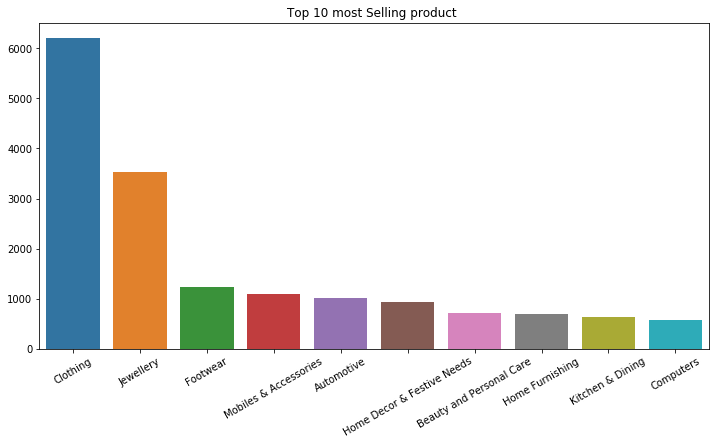

In [44]:
plt.figure(figsize=(12,6))
top_10_cat=categeries_count[:10].index.tolist()
top_10_cat_value=categeries_count[:10].values.tolist()
plot=sns.barplot(x=top_10_cat,y=top_10_cat_value,)
plt.setp(plot.get_xticklabels(), rotation=30)
plt.title('Top 10 most Selling product ',)
plt.show()

**Observation: from the above graph its look like Most of the customer prefer getting Cloths from Flipkart.**

## Most Frequent Product

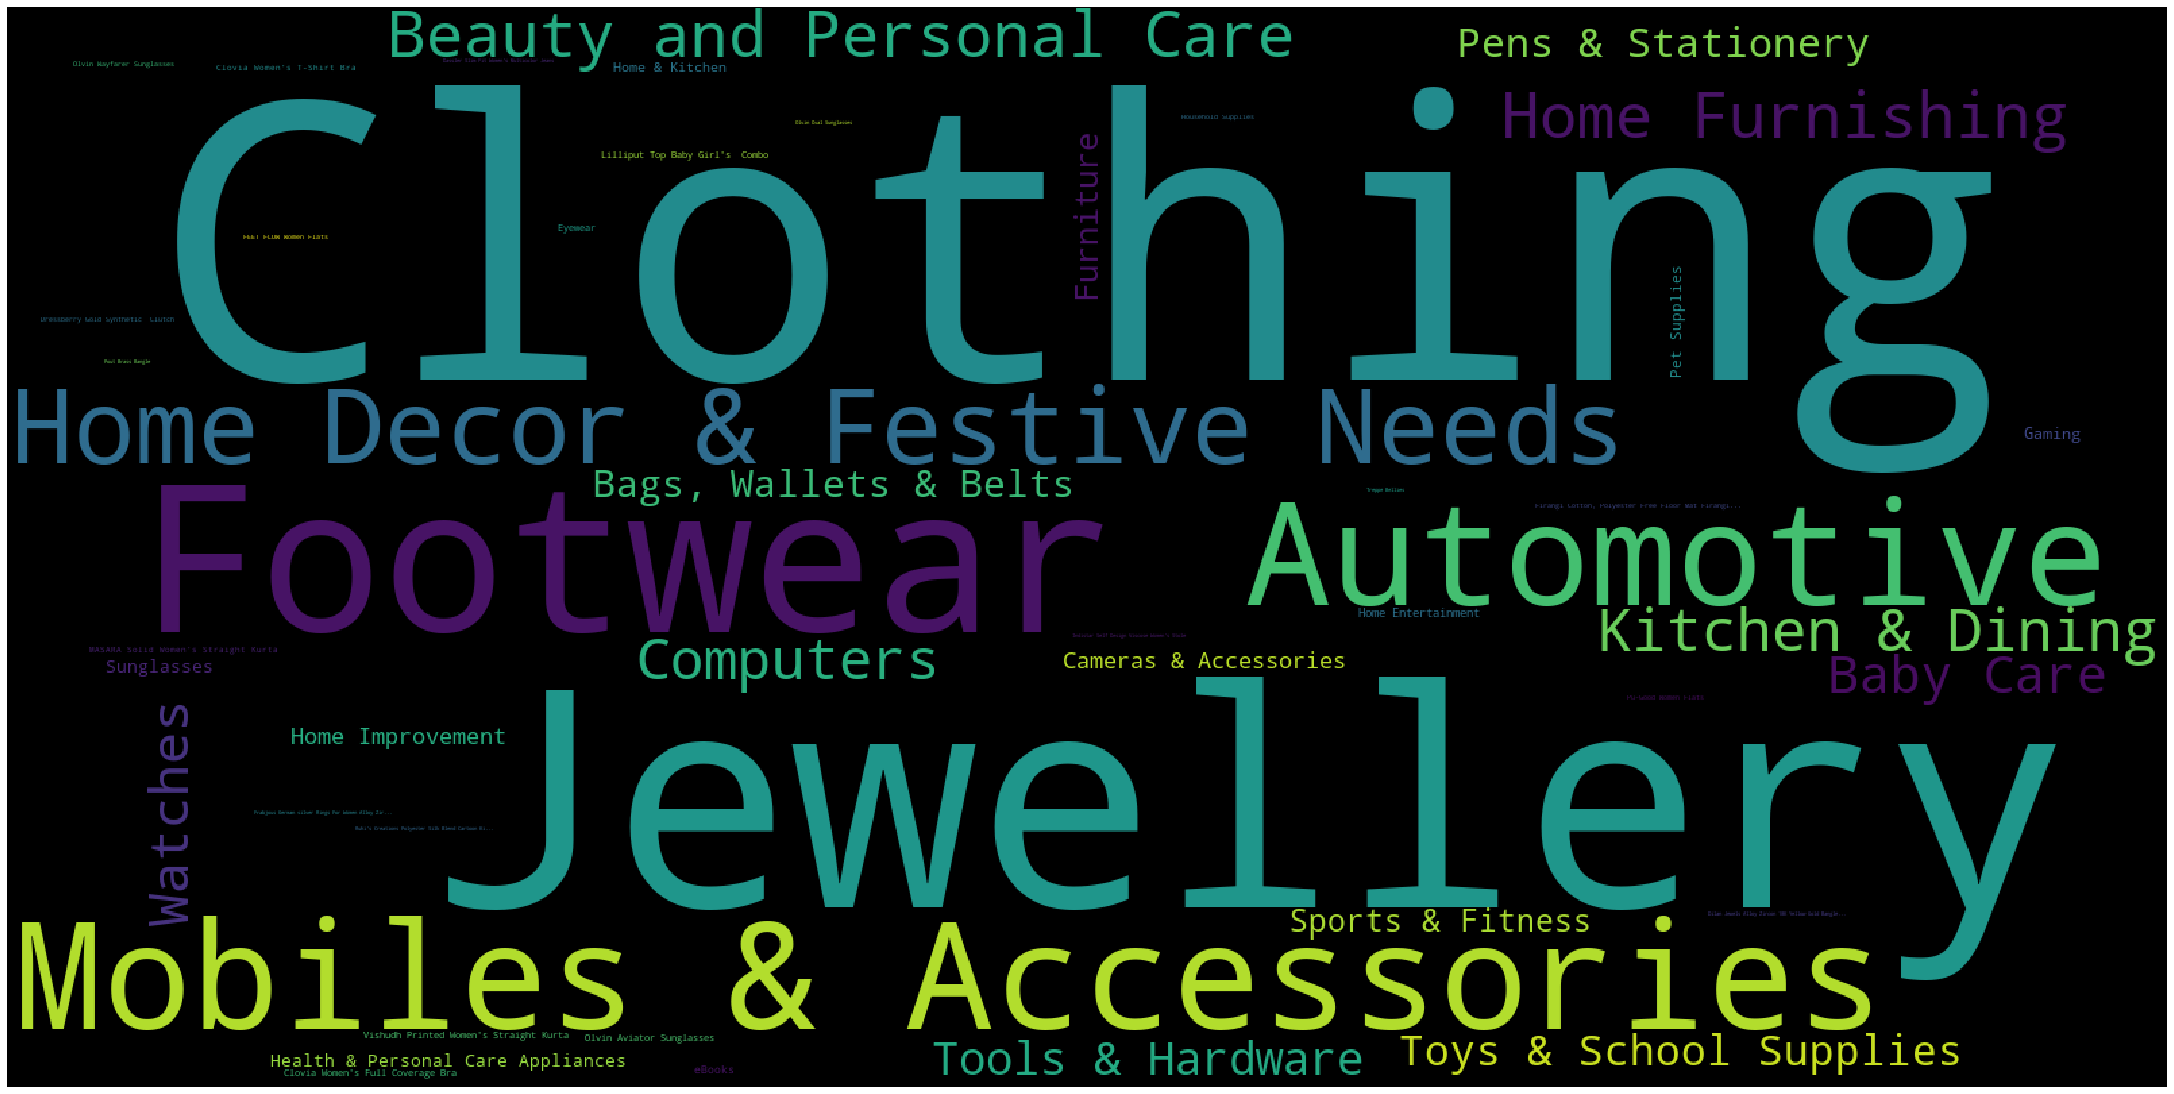

In [45]:
# Ploting word cloud
import datetime
from datetime import datetime
start = datetime.now()

# Lets first convert the 'result' dictionary to 'list of tuples'
tup = dict(result.items())
#Initializing WordCloud using frequencies of tags.
wordcloud = WordCloud(    background_color='black',
                          width=1600,
                          height=800,
                    ).generate_from_frequencies(tup)

fig = plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
fig.savefig("tag.png")
plt.show()
print("Time taken to run this cell :", datetime.now() - start)

**Observations: A look at the word cloud shows that "clothing", "Jewellery", "Footwear", "Mobiles & Accessories", "Automotive", "Home Decor & Festive Needs" are some of the most frequent buy product.**

In [46]:
#changing time/Convert crawl_timestamp to datetime
filtered_df['crawl_timestamp']=pd.to_datetime(filtered_df['crawl_timestamp'],)

Time taken to run this cell : 0:00:04.917702


# Sorting dataset based on 'Time' feature

In [47]:
filtered_df=filtered_df.sort_values(by="crawl_timestamp")
filtered_df.head(10)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,Cleaned_Description,Product_category
6604,371eca6d033c56a6df883a042526e4eb,2015-12-01 06:13:00+00:00,http://www.flipkart.com/imli-street-alloy-bras...,"Imli Street Alloy, Brass Necklace","[""Jewellery >> Necklaces & Chains >> Necklaces""]",NKCE5MEFXGSS6G6U,599.0,300.0,"[""http://img5a.flixcart.com/image/necklace-cha...",False,"Imli Street Alloy, Brass Necklace - Buy Imli S...",No rating available,No rating available,Imli Street,"{""product_specification""=>[{""key""=>""Collection...",imli street alloy brass necklace buy imli stre...,Jewellery
6170,7d1adfefeedb1e320edf369b2758e042,2015-12-01 06:13:00+00:00,http://www.flipkart.com/kolkata-knight-riders-...,Kolkata Knight Riders Combo Set,"[""Beauty and Personal Care >> Fragrances >> De...",CAGEYFZWDZYE5VPH,380.0,315.0,"[""http://img5a.flixcart.com/image/combo-gift-s...",False,Flipkart.com: Buy Kolkata Knight Riders Combo ...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Number of ...",flipkart com buy kolkata knight riders combo s...,Beauty and Personal Care
6171,3c0f6251ba3ffe5d489e5f14a3d3e2ea,2015-12-01 06:13:00+00:00,http://www.flipkart.com/disney-minnie-cartoon-...,Disney Minnie Cartoon Art Plastic Pencil Box,"[""Toys & School Supplies >> School Supplies >>...",PBXE5YG7NN4GWTKG,299.0,269.0,"[""http://img6a.flixcart.com/image/pencil-box/t...",False,Flipkart.com: Buy Disney Minnie Cartoon Art Pl...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Series"", ""...",flipkart com buy disney minnie cartoon art pla...,Toys & School Supplies
6172,aae26022cadbb64ba64df432568ba938,2015-12-01 06:13:00+00:00,http://www.flipkart.com/jewelizer-crystal-allo...,Jewelizer Crystal Alloy Necklace,"[""Jewellery >> Necklaces & Chains >> Necklaces""]",NKCE2F5HBJYC6TBZ,899.0,449.0,"[""http://img5a.flixcart.com/image/necklace-cha...",False,Jewelizer Crystal Alloy Necklace - Buy Jeweliz...,No rating available,No rating available,Jewelizer,"{""product_specification""=>[{""key""=>""Collection...",jewelizer crystal alloy necklace buy jewelizer...,Jewellery
6173,00f56d155dc1c8cbe410e92169cc6dc6,2015-12-01 06:13:00+00:00,http://www.flipkart.com/priya-exports-angel-be...,Priya Exports Angel Bear Art Plastic Pencil Box,"[""Toys & School Supplies >> School Supplies >>...",PBXE6JCKFHDZBZYQ,500.0,300.0,"[""http://img6a.flixcart.com/image/pill-splitte...",False,Flipkart.com: Buy Priya Exports Angel Bear Art...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Series"", ""...",flipkart com buy priya exports angel bear art ...,Toys & School Supplies
6174,7eb581f14b1dc71c3ca0ce6f6c5779aa,2015-12-01 06:13:00+00:00,http://www.flipkart.com/jadoo-collections-allo...,Jadoo Collections Alloy Necklace,"[""Jewellery >> Necklaces & Chains >> Necklaces""]",NKCEAX7HMXEAZEFR,599.0,299.0,"[""http://img5a.flixcart.com/image/necklace-cha...",False,Jadoo Collections Alloy Necklace - Buy Jadoo C...,No rating available,No rating available,Jadoo Collections,"{""product_specification""=>[{""key""=>""Brand"", ""v...",jadoo collections alloy necklace buy jadoo col...,Jewellery
6175,52c5fe837181962a7c1d5883bb9d7007,2015-12-01 06:13:00+00:00,http://www.flipkart.com/yardley-red-roses-lace...,Yardley Red Roses and Lace Combo Set,"[""Beauty and Personal Care >> Fragrances >> De...",CAGE6FYKCSZ4PUFR,380.0,319.0,"[""http://img6a.flixcart.com/image/combo-gift-s...",False,Flipkart.com: Buy Yardley Red Roses and Lace C...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Number of ...",flipkart com buy yardley red roses lace combo ...,Beauty and Personal Care
6176,539f82930cfad8afef1a75882eb45703,2015-12-01 06:13:00+00:00,http://www.flipkart.com/nivea-fresh-power-boos...,Nivea Fresh Power Boost 

# Apply Logistic Regression, Random Forest & XgBoost
1. Apply Logistic Regression on these feature sets

    * Review text, preprocessed one converted into vectors using (BOW)
    * Review text, preprocessed one converted into vectors using (TFIDF)
    * Review text, preprocessed one converted into vectors using (TFIDF W2v)
2. Hyper paramter tuning (find best hyper parameters corresponding the algorithm that you choose)

    * Finding the best hyper paramter using k-fold cross validation or simple cross validation data
      OR
    * Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning
3. Representation of results

    * ploting the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure.
    * Once after we found the best hyper parameter, we need to train your model with it, and find the F1score on test data and plot the Confusion matrix test data.

# Splitting the data into train, cv , test data

In [48]:
y=filtered_df['Product_category']
X=filtered_df['Cleaned_Description']
print("Shape of X",X.shape)
print("Shape of y",y.shape)

Shape of X (19666,)
Shape of y (19666,)


In [49]:
#Splitting the dataset into train, cv , test data
from sklearn.model_selection import train_test_split
# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_tr ,X_test,y_tr,y_test = train_test_split(X,y,test_size=.25,stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_tr, y_tr, test_size=.30, stratify=y_tr)
print('Shape of X_train is :',X_train.shape)
print('Shape of y_train is :',y_train.shape)
print("****"*6)
print('Shape of X_Cv is :',X_cv.shape)
print('Shape of y_cv is :',y_cv.shape)
print("****"*6)
print('Shape of X_test is :',X_test.shape)
print('Shape of y_test is :',y_test.shape)
print("****"*6)
print('Shape of X_tr is :',X_tr.shape)
print('Shape of y_tr is :',y_tr.shape)

Shape of X_train is : (10324,)
Shape of y_train is : (10324,)
************************
Shape of X_Cv is : (4425,)
Shape of y_cv is : (4425,)
************************
Shape of X_test is : (4917,)
Shape of y_test is : (4917,)
************************
Shape of X_tr is : (14749,)
Shape of y_tr is : (14749,)


In [50]:
# Transforming non numerical labels into numerical labels
from sklearn.preprocessing import LabelBinarizer
encoder=LabelBinarizer()
# encoding train labels 
encoder.fit(y_train)
y_train_en=encoder.transform(y_train)
# encoding test labels 
y_test_en = encoder.transform(y_test)
# encoding test labels 
y_cv_en = encoder.transform(y_cv)

In [50]:
X_train

10975    buy homeehub polyester multicolor self design ...
5994     imitzworld yellow gold plated alloy necklace b...
11971    sukkhi zinc rhodium bangle set buy sukkhi zinc...
13024    buy hoko book cover samsung galaxy note editio...
5331     key features katalogue women girls heels occas...
                               ...                        
1073     key features abony women gathered dress wester...
16821    abhira top girl combo price rs abhira presents...
532      bonzer bellies buy bonzer bellies rs flipkart ...
16903    bgs alloy crystal bracelet price rs bgs stunni...
14905    provogue slim fit men jeans buy blue provogue ...
Name: Cleaned_Description, Length: 10324, dtype: object

# Conveting text into vectors using Bow

In [51]:
#Bow in sklearn: Convert a collection of text documents to a matrix of token counts
vectorizer=CountVectorizer()
vectorizer.fit(X_train)
# Using the tranform funct of CountVectorizer to convert text to vectors
X_train_bow=vectorizer.transform(X_train)
X_cv_bow=vectorizer.transform(X_cv)
X_test_bow=vectorizer.transform(X_test)
print("After vectorizations")
print(X_train_bow.shape, y_train.shape)
print(X_cv_bow.shape, y_cv.shape)
print(X_test_bow.shape, y_test.shape)

After vectorizations
(10324, 14331) (10324,)
(4425, 14331) (4425,)
(4917, 14331) (4917,)


**YOU SHOULD NOT DO LIKE THIS**

1. THE VOCABULARY SHOULD BUILT ONLY WITH THE WORDS OF TRAIN DATA
    * vectorizer = CountVectorizer()
    * x_train_bow = vectorizer.fit_transform(X_train)
    * x_cv_bow = vectorizer.fit_transform(X_cv)
    * x_test_bow = vectorizer.fit_transform(X_test)
    
    
2. DATA LEAKAGE PROBLEM: IF WE DO LIKE THIS WE ARE LOOKING AT THE TEST DATA BEFORE MODELING
    * vectorizer = CountVectorizer()
    * X_bow = vectorizer.fit_transfomr(X)
    * X_train, X_test, y_train, y_test = train_test_split(X_bow, Y, test_size=0.33)
    
    
3. YOU SHOULD PASS THE PROBABILITY SCORES NOT THE PREDICTED VALUES
    * y_pred = neigh.predict(X)
    * roc_auc_score(y_ture,y_pred)

In [52]:
# Standardising the data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler(with_mean=False)
scaler.fit(X_train_bow)
X_tr_bow=scaler.transform(X_train_bow)
X_test_bow=scaler.transform(X_test_bow)
X_cv_bow=scaler.transform(X_cv_bow)
print("After standardising")
print(X_tr_bow.shape, y_train.shape)
print(X_cv_bow.shape, y_cv.shape)
print(X_test_bow.shape, y_test.shape)

After standardising
(10324, 14331) (10324,)
(4425, 14331) (4425,)
(4917, 14331) (4917,)


# Conveting text into vectors using TfidfVectorizer

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Conveting text into vectors using Tfidfvectorizer
tf_idf_vect=TfidfVectorizer(ngram_range=(1,3))
tf_idf_vect.fit(X_train)
# we use the fited Countvectorizer to convert the text into vectors
X_train_tfidf=tf_idf_vect.transform(X_train)
X_cv_tfidf=tf_idf_vect.transform(X_cv)
X_test_tfidf=tf_idf_vect.transform(X_test)
print("After vectorizations")
print(X_train_tfidf.shape, y_train.shape)
print(X_cv_tfidf.shape, y_cv.shape)
print(X_test_tfidf.shape, y_test.shape)
#print("="*100)

After vectorizations
(10324, 241428) (10324,)
(4425, 241428) (4425,)
(4917, 241428) (4917,)


# Conveting text into vectors using WeightedW2v Tfidf

In [67]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
# Train your own Word2Vec model using your own text corpus
import gensim
i=0
list_sent_X_cv=[]
for sent in X_cv.values:
    list_sent_X_cv.append(sent.split())
list_sent_X_test=[]
for sent in X_test.values:
    list_sent_X_test.append(sent.split())
list_sent_X_train=[]
for sent in X_train.values:
    list_sent_X_train.append(sent.split())

In [68]:
print(X_train.values[0])
print('*'*40)
print(list_sent_X_train[0])

buy homeehub polyester multicolor self design eyelet door curtain rs flipkart com genuine products free shipping cash delivery
****************************************
['buy', 'homeehub', 'polyester', 'multicolor', 'self', 'design', 'eyelet', 'door', 'curtain', 'rs', 'flipkart', 'com', 'genuine', 'products', 'free', 'shipping', 'cash', 'delivery']


In [69]:
# To Train the word2vec model
w2v_model=gensim.models.Word2Vec(list_sent_X_train,min_count=3,size=100,workers=4)
#min_count :means if a word doesnt occur atleast 3 times don't create word2vec
# vector_size :is the number of dimensions (N) of the N-dimensional space that gensim Word2Vec maps the words onto.
#workers : the last of the major parameters (full list here) is for training parallelization, to speed up training:

In [70]:
#Printing vector for necklace
print(w2v_model.wv['necklace'])

[ 0.7031605   0.5548106  -2.0090733  -1.5701503   1.9118704   0.7615344
 -0.5849878   0.5901863  -0.56687886 -1.44623    -1.0600953  -0.6250851
 -0.19287534  1.3702776  -6.4265156  -0.11444408 -3.0581896  -1.7891692
  1.5544537  -1.3571006   0.45799914  0.83171827  0.6544841   1.4952472
  1.5871607  -0.7723099   3.2321165   1.4905686   0.8894046  -3.3284514
  0.00936147  0.2435575   1.600683   -2.0893884  -0.65196204 -1.4226408
 -0.08546415 -1.8991702  -1.7482222  -0.24399433  1.0480722   0.5757822
  1.9295722   1.0485246  -2.16641    -1.6140181  -1.7389092   0.47900864
  2.09636    -0.1255496   0.27242783 -0.16610123  0.39122033 -4.166353
 -0.8714043  -2.7638903   1.723742    2.143052   -2.73588    -0.83437616
  1.7836827   0.03671247  2.8790195  -2.830886    1.8119714  -1.0441357
 -1.254755    0.33558977  0.9693414   1.4366986   0.971782    0.6095195
  0.59891105 -2.1312218   2.670259    0.52587306 -1.1353682  -0.3752847
 -0.06619319 -0.53871185  1.0212696   0.7246318  -0.66898924  0

In [71]:
#Printing most common word related to necklace
print(w2v_model.wv.most_similar('necklace'))
print('='*50)
print(w2v_model.wv.most_similar('genuine'))

[('alloy', 0.9055531024932861), ('choker', 0.9030454158782959), ('multistrand', 0.8648509979248047), ('joyeria', 0.8486541509628296), ('plated', 0.8471478223800659), ('crystal', 0.8427956104278564), ('bracelet', 0.8390607237815857), ('resin', 0.8361392021179199), ('milan', 0.8351376056671143), ('metal', 0.8236070871353149)]
[('guarantee', 0.8513387441635132), ('replacement', 0.8337852954864502), ('shipping', 0.8317771553993225), ('free', 0.8309171199798584), ('cash', 0.8097816705703735), ('day', 0.7949329018592834), ('products', 0.7582862377166748), ('delivery', 0.7499114274978638), ('flipkart', 0.7398783564567566), ('blanket', 0.7255408763885498)]


In [72]:
w2vwords=list(w2v_model.wv.vocab)
print('number of words that occured minimum 3 times',len(w2vwords))

number of words that occured minimum 3 times 8433


In [78]:
print('Sample words:',w2vwords[0:50])

Sample words: ['buy', 'homeehub', 'polyester', 'multicolor', 'self', 'design', 'eyelet', 'door', 'curtain', 'rs', 'flipkart', 'com', 'genuine', 'products', 'free', 'shipping', 'cash', 'delivery', 'imitzworld', 'yellow', 'gold', 'plated', 'alloy', 'necklace', 'day', 'replacement', 'guarantee', 'sukkhi', 'zinc', 'rhodium', 'bangle', 'set', 'hoko', 'book', 'cover', 'samsung', 'galaxy', 'note', 'edition', 'key', 'features', 'katalogue', 'women', 'girls', 'heels', 'occasion', 'ethnic', 'material', 'leather', 'color']


In [73]:
tf_idf_vector=TfidfVectorizer()
tf_idf_vector.fit(X_train.values)
#creating a dictinory with a word  as a key and the idf as value
dictionary=dict(zip(tf_idf_vector.get_feature_names(),list(tf_idf_vector.idf_)))

In [74]:
tfidf_feat=tf_idf_vector.get_feature_names()
#tfidf_feat = tf_idf_vect.fit_transform(final['Cleaned_description'].values)
# tfidf_feat is the sparse matrix with row= sentence, col=word and cell_val = tfidf

#finding weightedW2v for traning decription data of dimension 100
tf_idf_sent_vect_train=[]
row=0
for sent in tqdm(list_sent_X_train):
    sent_vec=np.zeros(100)
    weight_sum=0
    for word in sent:
        if word in w2vwords and word in tfidf_feat:
            vec=w2v_model.wv[word]
            #tf_idf=final_tf_idf[row,tfidf_feat.index(word)]
            # to reduce the computation we are computing 
            #dictionary[word]:idf value of the word in whole corpus
            #sent.count(word):tfvalues of word in this reviews
            tf_idf=dictionary[word]*(sent.count(word)/len(sent))
            #sent.count(word) gives us the count of word in sentence and
            #then we're dividing this term by total number of words in sent that gives us tf value.
            sent_vec+=(vec*tf_idf)
            weight_sum+=tf_idf
    if weight_sum!=0:
        sent_vec/=weight_sum
    tf_idf_sent_vect_train.append(sent_vec)
    row+=1
print(len(tf_idf_sent_vect_train))
print(len(tf_idf_sent_vect_train[0]))    

100%|████████████████████████████████████████████████████████████████████████████| 10324/10324 [02:50<00:00, 60.42it/s]

10324
100


In [75]:
#finding weightedW2v-tfidf for test decription data of dimension=100

tf_idf_sent_vect_test=[]
row=0
for sent in tqdm(list_sent_X_test):
    sent_vec=np.zeros(100)
    weight_sum=0
    for word in sent:
        if word in w2vwords and word in tfidf_feat:
            vec=w2v_model.wv[word]
            #tf_idf=final_tf_idf[row,tfidf_feat.index(word)]
            # to reduce the computation we are computing 
            #dictionary[word]:idf value of the word in whole corpus
            #sent.count(word):tfvalues of word in this reviews
            tf_idf=dictionary[word]*(sent.count(word)/len(sent))
            #sent.count(word) gives us the count of word in sentence and
            #then we're dividing this term by total number of words in sent that gives us tf value.
            sent_vec+=(vec*tf_idf)
            weight_sum+=tf_idf
    if weight_sum!=0:
        sent_vec/=weight_sum
    tf_idf_sent_vect_test.append(sent_vec)
    row+=1
print(len(tf_idf_sent_vect_test))
print(len(tf_idf_sent_vect_test[0]))  

100%|██████████████████████████████████████████████████████████████████████████████| 4917/4917 [01:22<00:00, 59.94it/s]

4917
100


In [76]:
#finding weightedW2v-tfidf for cv decription data of dimension=100
tf_idf_sent_vect_cv=[]
row=0
for sent in tqdm(list_sent_X_cv):
    sent_vec=np.zeros(100)
    weight_sum=0
    for word in sent:
        if word in w2vwords and word in tfidf_feat:
            vec=w2v_model.wv[word]
            #tf_idf=final_tf_idf[row,tfidf_feat.index(word)]
            # to reduce the computation we are computing 
            #dictionary[word]:idf value of the word in whole corpus
            #sent.count(word):tfvalues of word in this reviews
            tf_idf=dictionary[word]*(sent.count(word)/len(sent))
            #sent.count(word) gives us the count of word in sentence and
            #then we're dividing this term by total number of words in sent that gives us tf value.
            sent_vec+=(vec*tf_idf)
            weight_sum+=tf_idf
    if weight_sum!=0:
        sent_vec/=weight_sum
    tf_idf_sent_vect_cv.append(sent_vec)
    row+=1
print(len(tf_idf_sent_vect_cv))
print(len(tf_idf_sent_vect_cv[0]))  

100%|██████████████████████████████████████████████████████████████████████████████| 4425/4425 [01:09<00:00, 63.54it/s]

4425
100


In [77]:
#Strong the weightedW2v-tfiedf by diffrent name 
X_test_tfidf_w2v=tf_idf_sent_vect_test
X_train_tfidf_w2v=tf_idf_sent_vect_train
X_cv_tfidf_w2v=tf_idf_sent_vect_cv

# 1.1 Applying Logistic Regression with OneVsRest Classifier (L2 regularization) on BOW
### BOW [Bag of Words]: A Simple tecnique to convert words to vector

In [54]:
alpha = [10 ** x for x in range(-5, 5)] # hyperparam for SGD classifier.
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.
cv_loss=[]
for i in alpha:
    classifier=OneVsRestClassifier(SGDClassifier(loss='log',alpha=i,penalty='l2'),n_jobs=-1)
    classifier.fit(X_tr_bow, y_train)
    predictions = classifier.predict (X_cv_bow)
    print("Accuracy with alpha=",i,">>>",metrics.accuracy_score(y_cv, predictions))
    print("Hamming loss with alpha=",i,">>>",metrics.hamming_loss(y_cv,predictions))
    precision = precision_score(y_cv, predictions, average='micro')
    recall = recall_score(y_cv, predictions, average='micro')
    f1 = f1_score(y_cv, predictions, average='micro')
    print("Micro-average quality numbers")
    print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))
    print (metrics.classification_report(y_cv, predictions))
    ham_loss=metrics.hamming_loss(y_cv,predictions)
    cv_loss.append(ham_loss)

Accuracy with alpha= 1e-05 >>> 0.9138983050847458
Hamming loss with alpha= 1e-05 >>> 0.08610169491525424
Micro-average quality numbers
Precision: 0.9139, Recall: 0.9139, F1-measure: 0.9139
                                   precision    recall  f1-score   support

                       Automotive       0.93      0.93      0.93       228
                        Baby Care       0.82      0.79      0.80       109
            Bags, Wallets & Belts       0.78      0.85      0.82        60
         Beauty and Personal Care       0.86      0.85      0.85       160
            Cameras & Accessories       0.73      0.84      0.78        19
                         Clothing       0.97      0.95      0.96      1394
                        Computers       0.75      0.88      0.81       130
                          Eyewear       0.29      1.00      0.44         2
                         Footwear       0.97      0.96      0.96       276
                        Furniture       0.87      0.95      

Accuracy with alpha= 0.1 >>> 0.9371751412429379
Hamming loss with alpha= 0.1 >>> 0.06282485875706215
Micro-average quality numbers
Precision: 0.9372, Recall: 0.9372, F1-measure: 0.9372
                                   precision    recall  f1-score   support

                       Automotive       0.92      0.93      0.93       228
                        Baby Care       0.94      0.70      0.80       109
            Bags, Wallets & Belts       0.85      0.73      0.79        60
         Beauty and Personal Care       0.89      0.88      0.88       160
            Cameras & Accessories       0.94      0.89      0.92        19
                         Clothing       0.97      1.00      0.98      1394
                        Computers       0.95      0.82      0.88       130
                          Eyewear       1.00      1.00      1.00         2
                         Footwear       1.00      0.97      0.98       276
                        Furniture       0.95      0.98      0.96

Accuracy with alpha= 1000 >>> 0.6528813559322034
Hamming loss with alpha= 1000 >>> 0.34711864406779663
Micro-average quality numbers
Precision: 0.6529, Recall: 0.6529, F1-measure: 0.6529
                                   precision    recall  f1-score   support

                       Automotive       0.98      0.86      0.91       228
                        Baby Care       1.00      0.01      0.02       109
            Bags, Wallets & Belts       1.00      0.07      0.12        60
         Beauty and Personal Care       0.97      0.19      0.31       160
            Cameras & Accessories       1.00      0.11      0.19        19
                         Clothing       0.75      0.99      0.85      1394
                        Computers       1.00      0.30      0.46       130
                          Eyewear       0.00      0.00      0.00         2
                         Footwear       1.00      0.17      0.29       276
                        Furniture       1.00      0.27      0.

In [55]:
#optimal_alpha
optimal_alpha=alpha[cv_loss.index(min(cv_loss))]
optimal_alpha

0.1

**Observation** : the best hyperparamater (aplha)=.01 from above table

### Testing the model with best hyper paramters

In [56]:
start = datetime.now()
classifier = OneVsRestClassifier(SGDClassifier(loss='log', alpha=optimal_alpha, penalty='l2'), n_jobs=-1)
classifier.fit(X_tr_bow, y_train)
predictions = classifier.predict (X_test_bow)


print("Accuracy :",metrics.accuracy_score(y_test, predictions))
print("Hamming loss ",metrics.hamming_loss(y_test,predictions))


precision = precision_score(y_test, predictions, average='micro')
recall = recall_score(y_test, predictions, average='micro')
f1 = f1_score(y_test, predictions, average='micro')
 
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

print (metrics.classification_report(y_test, predictions))
print("Time taken to run this cell :", datetime.now() - start)

Accuracy : 0.9341061622940817
Hamming loss  0.06589383770591824
Micro-average quality numbers
Precision: 0.9341, Recall: 0.9341, F1-measure: 0.9341
                                   precision    recall  f1-score   support

                       Automotive       0.96      0.92      0.94       253
                        Baby Care       0.91      0.69      0.78       121
            Bags, Wallets & Belts       0.79      0.70      0.74        66
         Beauty and Personal Care       0.91      0.88      0.89       178
            Cameras & Accessories       0.95      0.95      0.95        20
                         Clothing       0.97      0.99      0.98      1549
                        Computers       0.95      0.84      0.89       145
                          Eyewear       1.00      1.00      1.00         2
                         Footwear       0.97      0.93      0.95       307
                        Furniture       1.00      0.96      0.98        45
                          

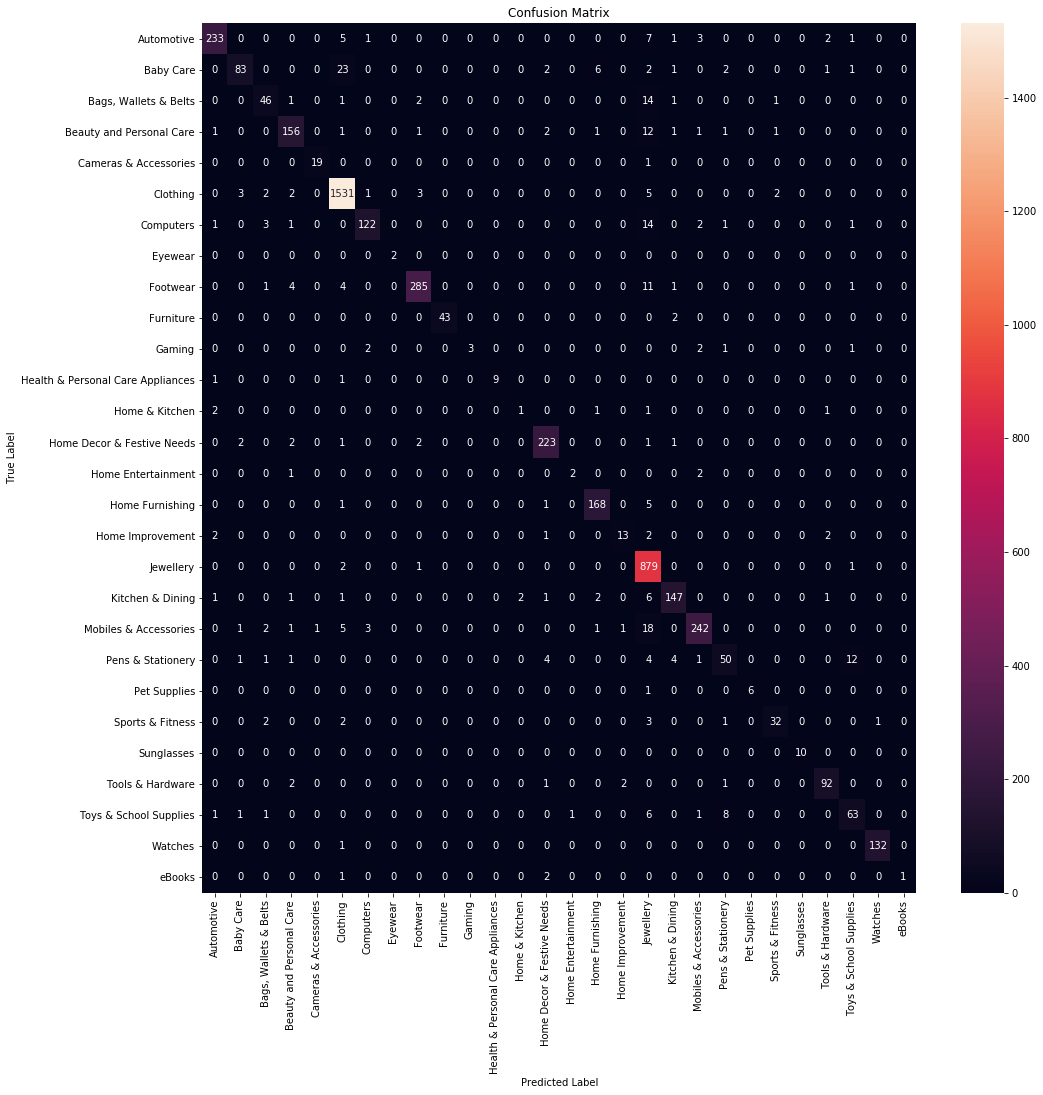

In [57]:
plt.figure(figsize=(16,16))
import seaborn as sns
conf_mat=confusion_matrix(y_test,predictions)
df=pd.DataFrame(conf_mat,index=classifier.classes_,columns=classifier.classes_)
sns.heatmap(df,annot=True,fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## 1.2 Applying Logistic Regression with OneVsRest Classifier (L1 regularization) on BOW

In [58]:
alpha = [10 ** x for x in range(-5, 5)] # hyperparam for SGD classifier.
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.
cv_loss=[]
for i in alpha:
    classifier=OneVsRestClassifier(SGDClassifier(loss='log',alpha=i,penalty='l1'),n_jobs=-1)
    classifier.fit(X_tr_bow, y_train)
    predictions = classifier.predict (X_cv_bow)
    print("Accuracy with alpha=",i,">>>",metrics.accuracy_score(y_cv, predictions))
    print("Hamming loss with alpha=",i,">>>",metrics.hamming_loss(y_cv,predictions))
    precision = precision_score(y_cv, predictions, average='micro')
    recall = recall_score(y_cv, predictions, average='micro')
    f1 = f1_score(y_cv, predictions, average='micro')
    print("Micro-average quality numbers")
    print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))
    print (metrics.classification_report(y_cv, predictions))
    ham_loss=metrics.hamming_loss(y_cv,predictions)
    cv_loss.append(ham_loss)

Accuracy with alpha= 1e-05 >>> 0.9064406779661017
Hamming loss with alpha= 1e-05 >>> 0.0935593220338983
Micro-average quality numbers
Precision: 0.9064, Recall: 0.9064, F1-measure: 0.9064
                                   precision    recall  f1-score   support

                       Automotive       0.91      0.91      0.91       228
                        Baby Care       0.82      0.76      0.79       109
            Bags, Wallets & Belts       0.82      0.85      0.84        60
         Beauty and Personal Care       0.87      0.85      0.86       160
            Cameras & Accessories       0.81      0.89      0.85        19
                         Clothing       0.97      0.95      0.96      1394
                        Computers       0.78      0.87      0.82       130
                          Eyewear       0.08      1.00      0.15         2
                         Footwear       0.95      0.94      0.94       276
                        Furniture       0.88      0.88      0

Accuracy with alpha= 0.1 >>> 0.5148022598870057
Hamming loss with alpha= 0.1 >>> 0.4851977401129943
Micro-average quality numbers
Precision: 0.5148, Recall: 0.5148, F1-measure: 0.5148
                                   precision    recall  f1-score   support

                       Automotive       0.26      0.56      0.35       228
                        Baby Care       0.00      0.00      0.00       109
            Bags, Wallets & Belts       0.00      0.00      0.00        60
         Beauty and Personal Care       0.00      0.00      0.00       160
            Cameras & Accessories       0.00      0.00      0.00        19
                         Clothing       0.54      0.99      0.70      1394
                        Computers       0.00      0.00      0.00       130
                          Eyewear       0.00      0.00      0.00         2
                         Footwear       0.00      0.00      0.00       276
                        Furniture       0.00      0.00      0.00 

Accuracy with alpha= 1000 >>> 0.02463276836158192
Hamming loss with alpha= 1000 >>> 0.9753672316384181
Micro-average quality numbers
Precision: 0.0246, Recall: 0.0246, F1-measure: 0.0246
                                   precision    recall  f1-score   support

                       Automotive       0.00      0.00      0.00       228
                        Baby Care       0.02      1.00      0.05       109
            Bags, Wallets & Belts       0.00      0.00      0.00        60
         Beauty and Personal Care       0.00      0.00      0.00       160
            Cameras & Accessories       0.00      0.00      0.00        19
                         Clothing       0.00      0.00      0.00      1394
                        Computers       0.00      0.00      0.00       130
                          Eyewear       0.00      0.00      0.00         2
                         Footwear       0.00      0.00      0.00       276
                        Furniture       0.00      0.00      0.

In [59]:
#optimal_alpha
optimal_alpha=alpha[cv_loss.index(min(cv_loss))]
optimal_alpha

1e-05

In [60]:
start = datetime.now()
classifier = OneVsRestClassifier(SGDClassifier(loss='log', alpha=optimal_alpha, penalty='l2'), n_jobs=-1)
classifier.fit(X_tr_bow, y_train)
predictions = classifier.predict (X_test_bow)


print("Accuracy :",metrics.accuracy_score(y_test, predictions))
print("Hamming loss ",metrics.hamming_loss(y_test,predictions))


precision = precision_score(y_test, predictions, average='micro')
recall = recall_score(y_test, predictions, average='micro')
f1 = f1_score(y_test, predictions, average='micro')
 
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

print (metrics.classification_report(y_test, predictions))
print("Time taken to run this cell :", datetime.now() - start)

Accuracy : 0.9160056945291845
Hamming loss  0.08399430547081554
Micro-average quality numbers
Precision: 0.9160, Recall: 0.9160, F1-measure: 0.9160
                                   precision    recall  f1-score   support

                       Automotive       0.95      0.92      0.93       253
                        Baby Care       0.85      0.76      0.80       121
            Bags, Wallets & Belts       0.76      0.79      0.78        66
         Beauty and Personal Care       0.88      0.88      0.88       178
            Cameras & Accessories       0.63      0.85      0.72        20
                         Clothing       0.97      0.96      0.96      1549
                        Computers       0.82      0.89      0.85       145
                          Eyewear       0.12      1.00      0.21         2
                         Footwear       0.96      0.93      0.94       307
                        Furniture       0.83      0.96      0.89        45
                          

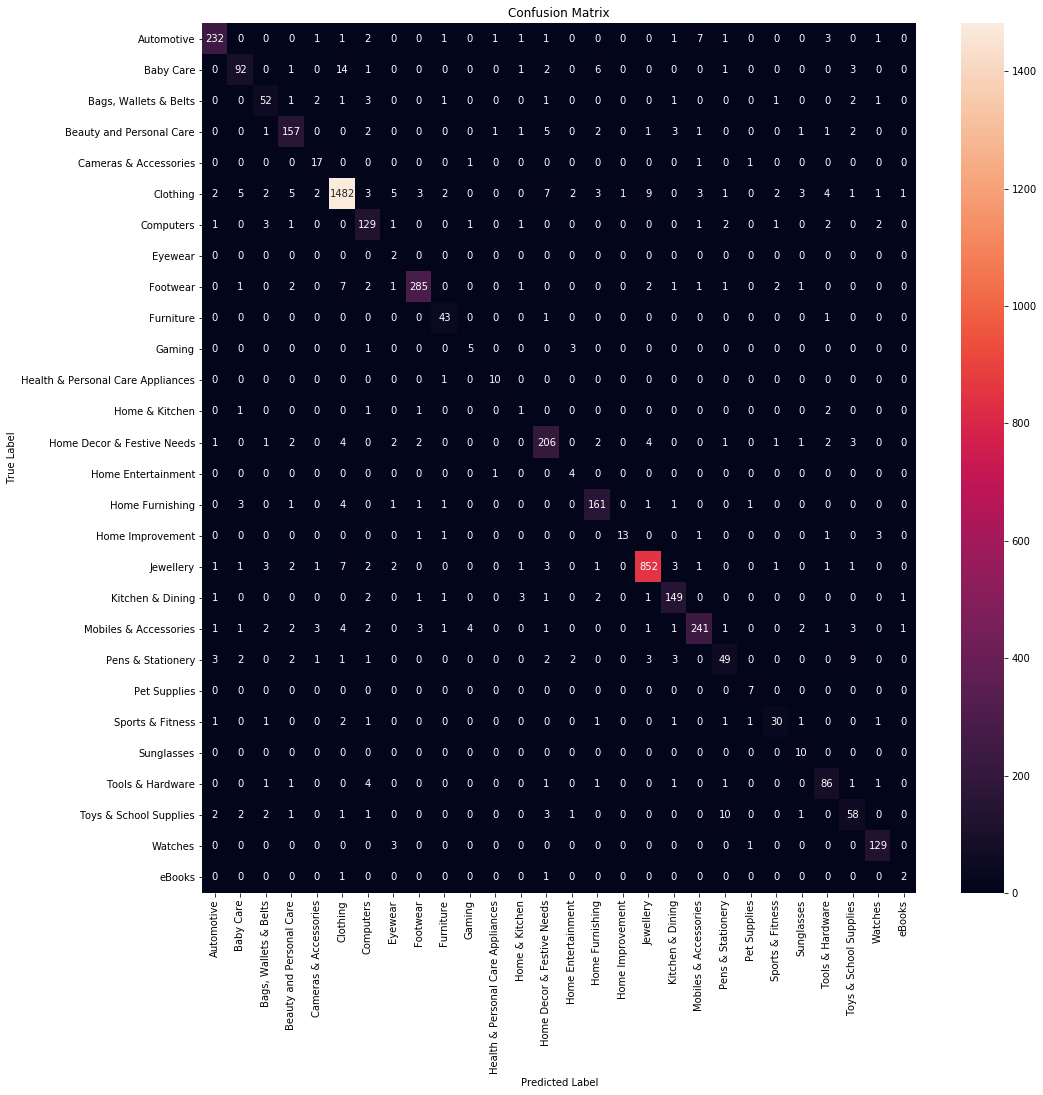

In [61]:
plt.figure(figsize=(16,16))
import seaborn as sns
conf_mat=confusion_matrix(y_test,predictions)
df=pd.DataFrame(conf_mat,index=classifier.classes_,columns=classifier.classes_)
sns.heatmap(df,annot=True,fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## 2. Applying Logistic Regression with OneVsRest Classifier (L2 regularization) on Tfidf

In [94]:
alpha = [10 ** x for x in range(-5, 5)] # hyperparam for SGD classifier.
from sklearn.linear_model import LogisticRegression
cv_loss=[]
for i in alpha:
    classifier=OneVsRestClassifier(SGDClassifier(loss='log',alpha=i,penalty='l2'),n_jobs=-1)
    classifier.fit(X_train_tfidf,y_train)
    predictions = classifier.predict (X_cv_tfidf)
    print("Accuracy with alpha=",i,">>>",metrics.accuracy_score(y_cv, predictions))
    print("Hamming loss with alpha=",i,">>>",metrics.hamming_loss(y_cv,predictions))
    precision = precision_score(y_cv, predictions, average='micro')
    recall = recall_score(y_cv, predictions, average='micro')
    f1 = f1_score(y_cv, predictions, average='micro')
    print("Micro-average quality numbers")
    print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))
    print (metrics.classification_report(y_cv, predictions))
    ham_loss=metrics.hamming_loss(y_cv,predictions)
    cv_loss.append(ham_loss)

Accuracy with alpha= 1e-05 >>> 0.9708474576271187
Hamming loss with alpha= 1e-05 >>> 0.029152542372881354
Micro-average quality numbers
Precision: 0.9708, Recall: 0.9708, F1-measure: 0.9708
                                   precision    recall  f1-score   support

                       Automotive       0.97      0.99      0.98       228
                        Baby Care       0.92      0.75      0.83       109
            Bags, Wallets & Belts       0.93      0.95      0.94        60
         Beauty and Personal Care       0.97      0.96      0.97       160
            Cameras & Accessories       1.00      0.95      0.97        19
                         Clothing       0.98      1.00      0.99      1394
                        Computers       0.97      0.97      0.97       130
                          Eyewear       1.00      1.00      1.00         2
                         Footwear       1.00      0.99      1.00       276
                        Furniture       1.00      1.00     

Accuracy with alpha= 0.1 >>> 0.3658757062146893
Hamming loss with alpha= 0.1 >>> 0.6341242937853108
Micro-average quality numbers
Precision: 0.3659, Recall: 0.3659, F1-measure: 0.3659
                                   precision    recall  f1-score   support

                       Automotive       0.00      0.00      0.00       228
                        Baby Care       0.00      0.00      0.00       109
            Bags, Wallets & Belts       0.00      0.00      0.00        60
         Beauty and Personal Care       0.00      0.00      0.00       160
            Cameras & Accessories       0.00      0.00      0.00        19
                         Clothing       0.33      1.00      0.50      1394
                        Computers       0.00      0.00      0.00       130
                          Eyewear       0.00      0.00      0.00         2
                         Footwear       0.00      0.00      0.00       276
                        Furniture       0.00      0.00      0.00 

Accuracy with alpha= 1000 >>> 0.03615819209039548
Hamming loss with alpha= 1000 >>> 0.9638418079096045
Micro-average quality numbers
Precision: 0.0362, Recall: 0.0362, F1-measure: 0.0362
                                   precision    recall  f1-score   support

                       Automotive       0.00      0.00      0.00       228
                        Baby Care       0.00      0.00      0.00       109
            Bags, Wallets & Belts       0.00      0.00      0.00        60
         Beauty and Personal Care       0.04      1.00      0.07       160
            Cameras & Accessories       0.00      0.00      0.00        19
                         Clothing       0.00      0.00      0.00      1394
                        Computers       0.00      0.00      0.00       130
                          Eyewear       0.00      0.00      0.00         2
                         Footwear       0.00      0.00      0.00       276
                        Furniture       0.00      0.00      0.


The optimal number of alpha is  1e-05


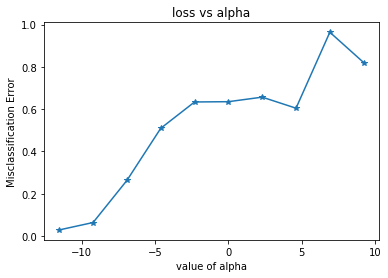

In [95]:
import math
optimal_aplha=alpha[cv_loss.index(min(cv_loss))]
aplha_values=[math.log(x) for x in alpha]
print('\nThe optimal number of alpha is ', optimal_aplha)
#Plot the misclassfication error vs alpha
plt.plot(aplha_values,cv_loss,marker='*')
plt.title("loss vs alpha")
plt.xlabel('value of alpha')
plt.ylabel('Misclassification Error')
plt.show()

In [96]:
start = datetime.now()
classifier = OneVsRestClassifier(SGDClassifier(loss='log', alpha=optimal_aplha, penalty='l2'), n_jobs=-1)
classifier.fit(X_train_tfidf, y_train)
predictions = classifier.predict (X_test_tfidf)


print("Accuracy :",metrics.accuracy_score(y_test, predictions))
print("Hamming loss ",metrics.hamming_loss(y_test,predictions))


precision = precision_score(y_test, predictions, average='micro')
recall = recall_score(y_test, predictions, average='micro')
f1 = f1_score(y_test, predictions, average='micro')
 
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

print (metrics.classification_report(y_test, predictions))
print("Time taken to run this cell :", datetime.now() - start)

Accuracy : 0.9694935936546675
Hamming loss  0.03050640634533252
Micro-average quality numbers
Precision: 0.9695, Recall: 0.9695, F1-measure: 0.9695
                                   precision    recall  f1-score   support

                       Automotive       0.97      0.98      0.98       253
                        Baby Care       0.95      0.77      0.85       121
            Bags, Wallets & Belts       0.97      0.94      0.95        66
         Beauty and Personal Care       0.98      0.94      0.96       178
            Cameras & Accessories       0.95      0.95      0.95        20
                         Clothing       0.97      1.00      0.98      1549
                        Computers       0.91      0.98      0.94       145
                          Eyewear       1.00      1.00      1.00         2
                         Footwear       0.99      0.98      0.99       307
                        Furniture       1.00      0.98      0.99        45
                          

# Confusion Matrix

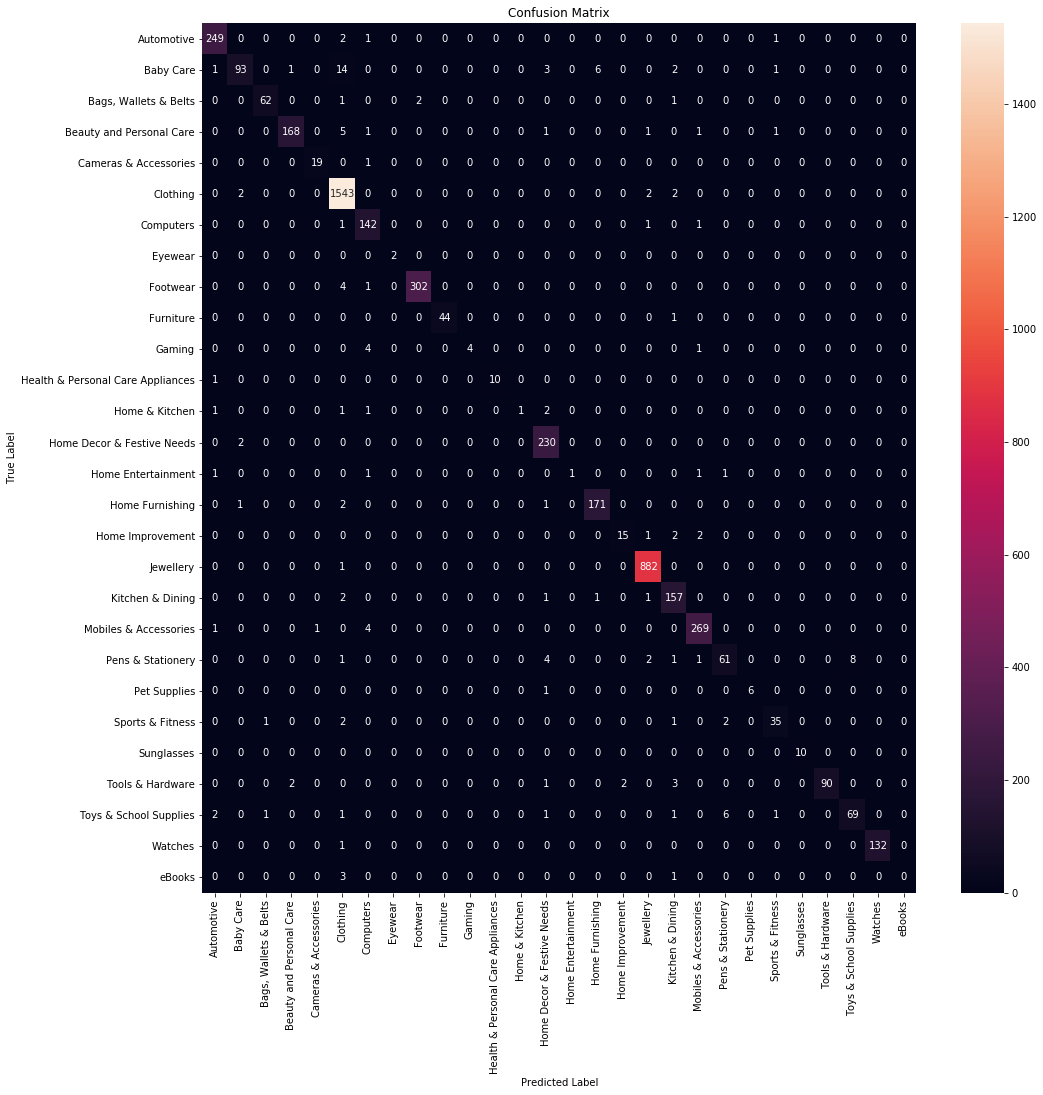

In [97]:
plt.figure(figsize=(16,16))
import seaborn as sns
conf_mat=confusion_matrix(y_test,predictions)
df=pd.DataFrame(conf_mat,index=classifier.classes_,columns=classifier.classes_)
sns.heatmap(df,annot=True,fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# 3. Applying Logistic Regression with OneVsRest Classifier (L2 regularization) on Tf-idf Weighted W2V 

In [186]:
#finding the best hyperparamter 
alpha = [10 ** x for x in range(-5, 5)] # hyperparam for SGD classifier.
from sklearn.linear_model import LogisticRegression
cv_loss=[]
for i in alpha:
    classifier=OneVsRestClassifier(SGDClassifier(loss='log',alpha=i,penalty='l2'),n_jobs=-1)
    classifier.fit(X_train_tfidf_w2v,y_train)
    predictions = classifier.predict (X_cv_tfidf_w2v)
    print("Accuracy with alpha=",i,">>>",metrics.accuracy_score(y_cv, predictions))
    print("Hamming loss with alpha=",i,">>>",metrics.hamming_loss(y_cv,predictions))
    precision = precision_score(y_cv, predictions, average='micro')
    recall = recall_score(y_cv, predictions, average='micro')
    f1 = f1_score(y_cv, predictions, average='micro')
    print("Micro-average quality numbers")
    print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))
    print (metrics.classification_report(y_cv, predictions))
    ham_loss=metrics.hamming_loss(y_cv,predictions)
    cv_loss.append(ham_loss)

Accuracy with alpha= 1e-05 >>> 0.911864406779661
Hamming loss with alpha= 1e-05 >>> 0.08813559322033898
Micro-average quality numbers
Precision: 0.9119, Recall: 0.9119, F1-measure: 0.9119
                                   precision    recall  f1-score   support

                       Automotive       0.93      0.94      0.94       228
                        Baby Care       0.76      0.58      0.66       109
            Bags, Wallets & Belts       0.88      0.62      0.73        60
         Beauty and Personal Care       0.83      0.84      0.83       160
            Cameras & Accessories       1.00      0.89      0.94        19
                         Clothing       0.95      0.99      0.97      1394
                        Computers       0.87      0.86      0.86       130
                          Eyewear       1.00      1.00      1.00         2
                         Footwear       0.97      0.96      0.97       276
                        Furniture       0.85      0.95      0

Accuracy with alpha= 0.1 >>> 0.7378531073446327
Hamming loss with alpha= 0.1 >>> 0.2621468926553672
Micro-average quality numbers
Precision: 0.7379, Recall: 0.7379, F1-measure: 0.7379
                                   precision    recall  f1-score   support

                       Automotive       0.75      0.91      0.82       228
                        Baby Care       0.00      0.00      0.00       109
            Bags, Wallets & Belts       0.00      0.00      0.00        60
         Beauty and Personal Care       0.81      0.53      0.64       160
            Cameras & Accessories       0.00      0.00      0.00        19
                         Clothing       0.74      1.00      0.85      1394
                        Computers       0.88      0.48      0.62       130
                          Eyewear       0.00      0.00      0.00         2
                         Footwear       0.52      0.55      0.54       276
                        Furniture       0.00      0.00      0.00 

Accuracy with alpha= 1000 >>> 0.3150282485875706
Hamming loss with alpha= 1000 >>> 0.6849717514124294
Micro-average quality numbers
Precision: 0.3150, Recall: 0.3150, F1-measure: 0.3150
                                   precision    recall  f1-score   support

                       Automotive       0.00      0.00      0.00       228
                        Baby Care       0.00      0.00      0.00       109
            Bags, Wallets & Belts       0.00      0.00      0.00        60
         Beauty and Personal Care       0.00      0.00      0.00       160
            Cameras & Accessories       0.00      0.00      0.00        19
                         Clothing       0.32      1.00      0.48      1394
                        Computers       0.00      0.00      0.00       130
                          Eyewear       0.00      0.00      0.00         2
                         Footwear       0.00      0.00      0.00       276
                        Furniture       0.00      0.00      0.0

The optimal number of alpha is  1e-05


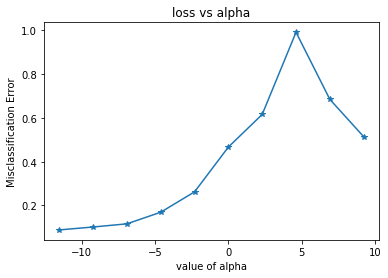

In [187]:
import math
optimal_alpha=alpha[cv_loss.index(min(cv_loss))]
aplha_values=[math.log(x) for x in alpha]
print('The optimal number of alpha is ', optimal_alpha)
#Plot the misclassfication error vs alpha
plt.plot(aplha_values,cv_loss,marker='*')
plt.title("loss vs alpha")
plt.xlabel('value of alpha')
plt.ylabel('Misclassification Error')
plt.show()

In [188]:
#building and trainng model using best hyperparameter
start = datetime.now()
classifier = OneVsRestClassifier(SGDClassifier(loss='log', alpha=optimal_alpha, penalty='l2'), n_jobs=-1)
classifier.fit(X_train_tfidf_w2v, y_train)
predictions = classifier.predict (X_test_tfidf_w2v)


print("Accuracy :",metrics.accuracy_score(y_test, predictions))
print("Hamming loss ",metrics.hamming_loss(y_test,predictions))


precision = precision_score(y_test, predictions, average='micro')
recall = recall_score(y_test, predictions, average='micro')
f1 = f1_score(y_test, predictions, average='micro')
 
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

print (metrics.classification_report(y_test, predictions))
print("Time taken to run this cell :", datetime.now() - start)

Accuracy : 0.9147854382753712
Hamming loss  0.08521456172462884
Micro-average quality numbers
Precision: 0.9148, Recall: 0.9148, F1-measure: 0.9148
                                   precision    recall  f1-score   support

                       Automotive       0.91      0.94      0.93       253
                        Baby Care       0.89      0.48      0.62       121
            Bags, Wallets & Belts       0.67      0.70      0.68        66
         Beauty and Personal Care       0.93      0.88      0.90       178
            Cameras & Accessories       0.88      0.70      0.78        20
                         Clothing       0.95      0.99      0.97      1549
                        Computers       0.90      0.90      0.90       145
                          Eyewear       0.00      0.00      0.00         2
                         Footwear       0.99      0.97      0.98       307
                        Furniture       1.00      0.71      0.83        45
                          

# Confusion Matrix

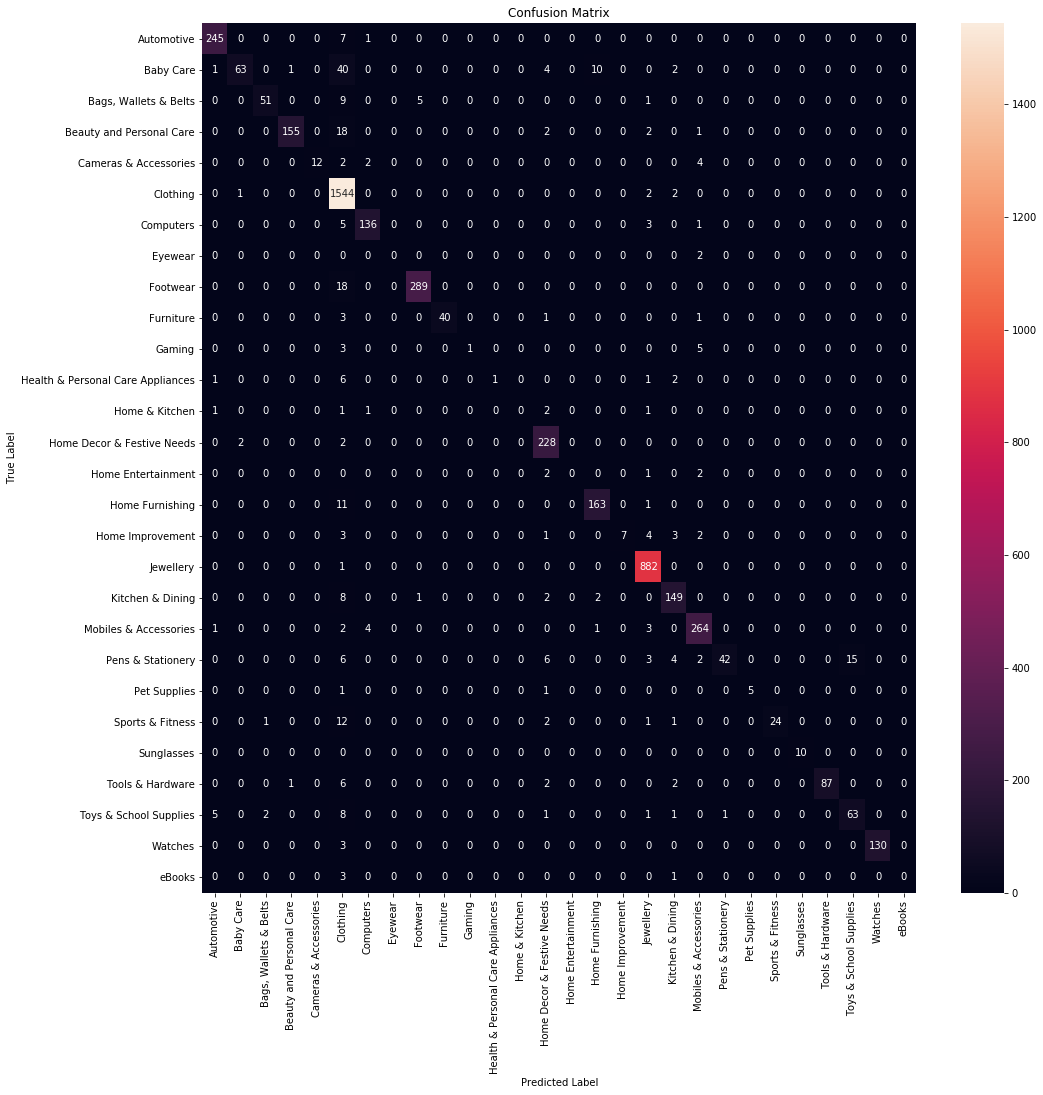

In [165]:
plt.figure(figsize=(16,16))
import seaborn as sns
conf_mat=confusion_matrix(y_test,predictions)
df=pd.DataFrame(conf_mat,index=classifier.classes_,columns=classifier.classes_)
sns.heatmap(df,annot=True,fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Applying Random Forest  on Bow

In [166]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

#**Hyperparameter tuning for Random Forest**
base_learners=[20,40,60,80,100,120]
depth = [5,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150]
param_grid={'n_estimators':base_learners,'max_depth':depth}
rf_model=RandomForestClassifier(max_features='sqrt')
model=GridSearchCV(rf_model,param_grid=param_grid,scoring='f1_micro',n_jobs=-1,cv=10)
model.fit(X_tr_bow,y_train)
print("Best Hyperparameter:",model.best_params_)
print(model.best_score_)

optimal n_estimators 80
optimal max_depth 500


In [179]:
#building and trainng model using best hyperparameter
rf_model=RandomForestClassifier(n_estimators=80,max_depth=500)
rf_model.fit(X_tr_bow,y_train)
predictions = rf_model.predict (X_test_bow)
print("Accuracy on cv",">>>",metrics.accuracy_score(y_test, predictions))
print("Hamming loss on cv",">>>",metrics.hamming_loss(y_test,predictions))
precision = precision_score(y_test, predictions, average='micro')
recall = recall_score(y_test, predictions, average='micro')
f1 = f1_score(y_test, predictions, average='micro')
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))
print (metrics.classification_report(y_test, predictions))

Accuracy on cv >>> 0.9572910311165345
Hamming loss on cv >>> 0.04270896888346553
Micro-average quality numbers
Precision: 0.9573, Recall: 0.9573, F1-measure: 0.9573
                                   precision    recall  f1-score   support

                       Automotive       0.97      0.98      0.97       253
                        Baby Care       0.97      0.61      0.75       121
            Bags, Wallets & Belts       0.95      0.94      0.95        66
         Beauty and Personal Care       0.97      0.90      0.93       178
            Cameras & Accessories       1.00      0.70      0.82        20
                         Clothing       0.95      1.00      0.97      1549
                        Computers       0.98      0.95      0.97       145
                          Eyewear       1.00      1.00      1.00         2
                         Footwear       1.00      0.96      0.98       307
                        Furniture       1.00      0.93      0.97        45
         

In [177]:
rf_model.classes_

array(['Automotive', 'Baby Care', 'Bags, Wallets & Belts',
       'Beauty and Personal Care', 'Cameras & Accessories', 'Clothing',
       'Computers', 'Eyewear', 'Footwear', 'Furniture', 'Gaming',
       'Health & Personal Care Appliances', 'Home & Kitchen',
       'Home Decor & Festive Needs', 'Home Entertainment',
       'Home Furnishing', 'Home Improvement', 'Jewellery',
       'Kitchen & Dining', 'Mobiles & Accessories', 'Pens & Stationery',
       'Pet Supplies', 'Sports & Fitness', 'Sunglasses',
       'Tools & Hardware', 'Toys & School Supplies', 'Watches', 'eBooks'],
      dtype=object)

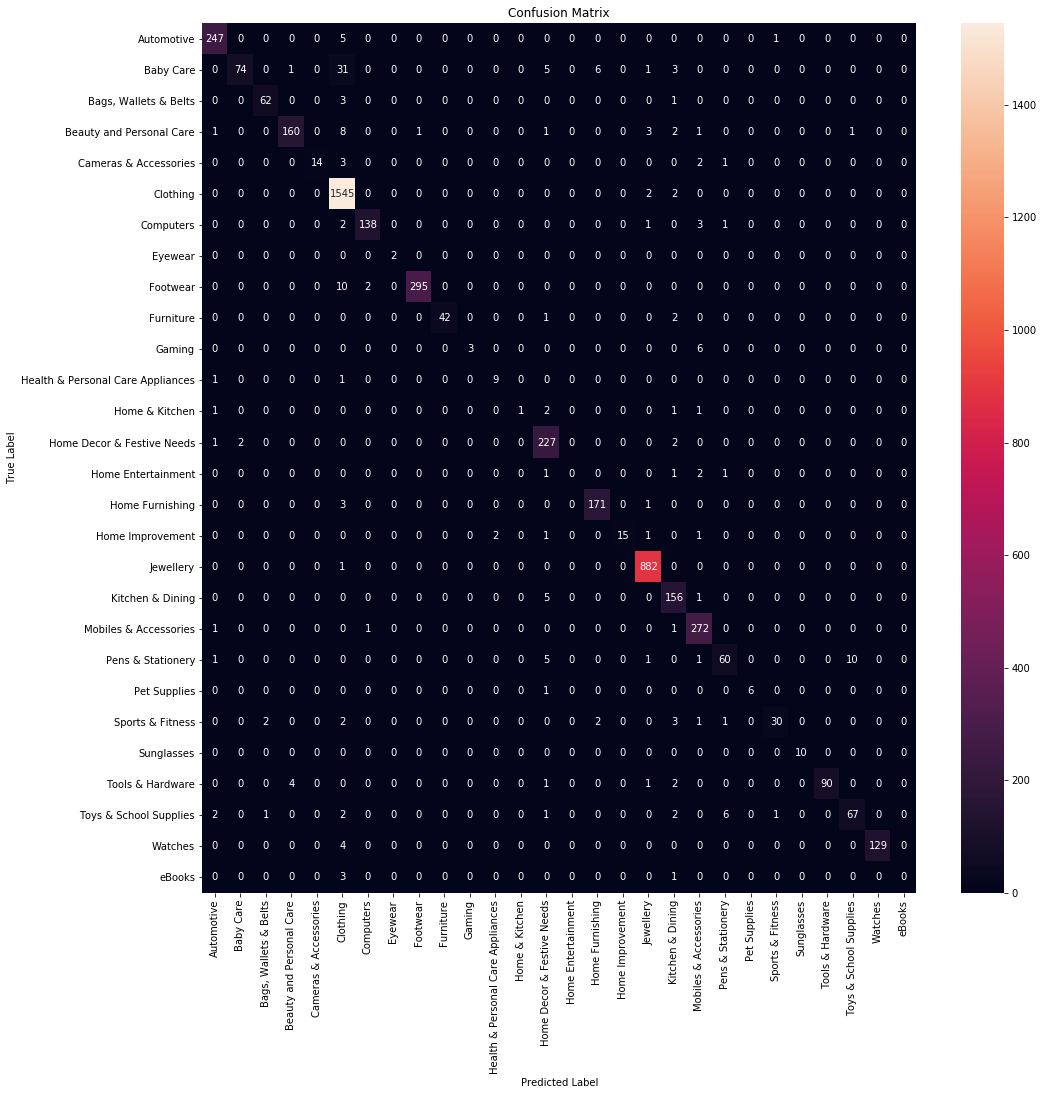

In [182]:
# Confusion Matrix
plt.figure(figsize=(16,16))
import seaborn as sns
conf_mat=confusion_matrix(y_test,predictions)
df_con=pd.DataFrame(conf_mat,index=rf_model.classes_,columns=rf_model.classes_)
sns.heatmap(df_con,annot=True,fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Applying Random Forest on Tf-idf Weighted W2V

In [237]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

#**Hyperparameter tuning for Random Forest**
param_grid={'bootstrap': [True, False],
            'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120], 
            'max_features': ['sqrt'],
            'min_samples_split': [2, 5, 10], 
                'n_estimators': [10,20,40,60,80,100,120,200,]}  #I have not used more parameter its taking a day for finding best hyperparameter
rf_model=RandomForestClassifier(max_features='sqrt')
model=GridSearchCV(rf_model,param_grid=param_grid,scoring='f1_micro',n_jobs=-1,cv=3,verbose=10)
model.fit(X_tr_tfidf_w2v,y_train)
print("Best Hyperparameter:",model.best_params_)
print(model.best_score_)

Fitting 3 folds for each of 528 candidates, totalling 1584 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   18.3s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   40.7s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  8

Best Hyperparameter: {'bootstrap': False, 'max_depth': 100, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200}
0.9392679778426999


In [239]:
#traning and building RF model using best hyperparamater
rf_model=RandomForestClassifier(n_estimators=200,max_depth=100,max_features='sqrt',
                                bootstrap=False,min_samples_split=2)
rf_model.fit(X_tr_tfidf_w2v,y_train)
predictions = rf_model.predict(X_test_tfidf_w2v)
print("Accuracy on cv",">>>",metrics.accuracy_score(y_test, predictions))
print("Hamming loss on cv",">>>",metrics.hamming_loss(y_test,predictions))
precision = precision_score(y_test, predictions, average='micro')
recall = recall_score(y_test, predictions, average='micro')
f1 = f1_score(y_test, predictions, average='micro')
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))
print (metrics.classification_report(y_test, predictions))

Accuracy on cv >>> 0.9430547081553793
Hamming loss on cv >>> 0.0569452918446207
Micro-average quality numbers
Precision: 0.9431, Recall: 0.9431, F1-measure: 0.9431
                                   precision    recall  f1-score   support

                       Automotive       0.95      0.97      0.96       253
                        Baby Care       0.91      0.58      0.71       121
            Bags, Wallets & Belts       0.90      0.85      0.88        66
         Beauty and Personal Care       0.90      0.90      0.90       178
            Cameras & Accessories       0.94      0.80      0.86        20
                         Clothing       0.96      1.00      0.98      1549
                        Computers       0.86      0.94      0.90       145
                          Eyewear       1.00      1.00      1.00         2
                         Footwear       0.98      0.97      0.98       307
                        Furniture       0.98      0.89      0.93        45
          

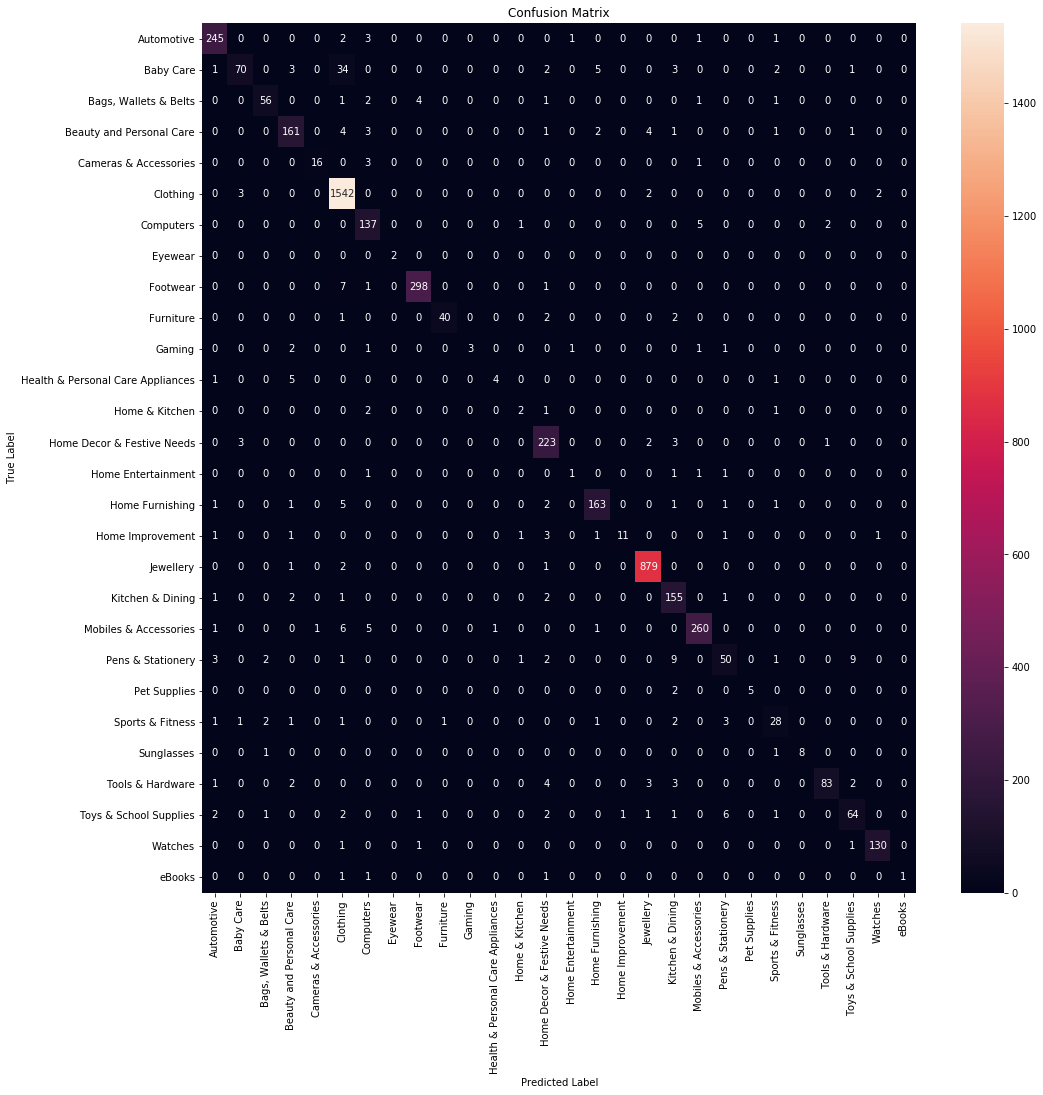

In [240]:
# Confusion Matrix
plt.figure(figsize=(16,16))
import seaborn as sns
conf_mat=confusion_matrix(y_test,predictions)
df_con=pd.DataFrame(conf_mat,index=rf_model.classes_,columns=rf_model.classes_)
sns.heatmap(df_con,annot=True,fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Applying Random Forest on Tf-idf

In [241]:
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

#**Hyperparameter tuning for Random Forest**
#Finding Best hyperparameter using GridsearchCv
param_grid={'max_depth': [10, 20,40, 50, 60, 70, 80, 90, 100, 110,None], 
            'n_estimators': [10,20,40,60,80,100,120,200],
            'min_samples_split': [2, 5, 10]}
rf_model=RandomForestClassifier(max_features='sqrt')
model=GridSearchCV(rf_model,param_grid=param_grid,scoring='f1_micro',n_jobs=-1,cv=3,verbose=10)
model.fit(X_train_tfidf,y_train)
print("Best Hyperparameter:",model.best_params_)
print(model.best_score_)

Fitting 3 folds for each of 264 candidates, totalling 792 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   28.9s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   40.8s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   50.0s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  7

Best Hyperparameter: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 60}
0.9420768447028499


In [242]:
#traning and building RF model using best hyperparamater
rf_model=RandomForestClassifier(n_estimators=80,max_depth=None)
rf_model.fit(X_train_tfidf,y_train)
predictions = rf_model.predict(X_test_tfidf)
print("Accuracy on cv",">>>",metrics.accuracy_score(y_test, predictions))
print("Hamming loss on cv",">>>",metrics.hamming_loss(y_test,predictions))
precision = precision_score(y_test, predictions, average='micro')
recall = recall_score(y_test, predictions, average='micro')
f1 = f1_score(y_test, predictions, average='micro')
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))
print (metrics.classification_report(y_test, predictions))

Accuracy on cv >>> 0.9341061622940817
Hamming loss on cv >>> 0.06589383770591824
Micro-average quality numbers
Precision: 0.9341, Recall: 0.9341, F1-measure: 0.9341
                                   precision    recall  f1-score   support

                       Automotive       0.99      0.94      0.96       253
                        Baby Care       1.00      0.53      0.69       121
            Bags, Wallets & Belts       0.95      0.85      0.90        66
         Beauty and Personal Care       0.96      0.91      0.93       178
            Cameras & Accessories       1.00      0.65      0.79        20
                         Clothing       0.94      1.00      0.97      1549
                        Computers       0.68      0.94      0.79       145
                          Eyewear       1.00      1.00      1.00         2
                         Footwear       0.96      0.85      0.90       307
                        Furniture       0.84      0.91      0.87        45
         

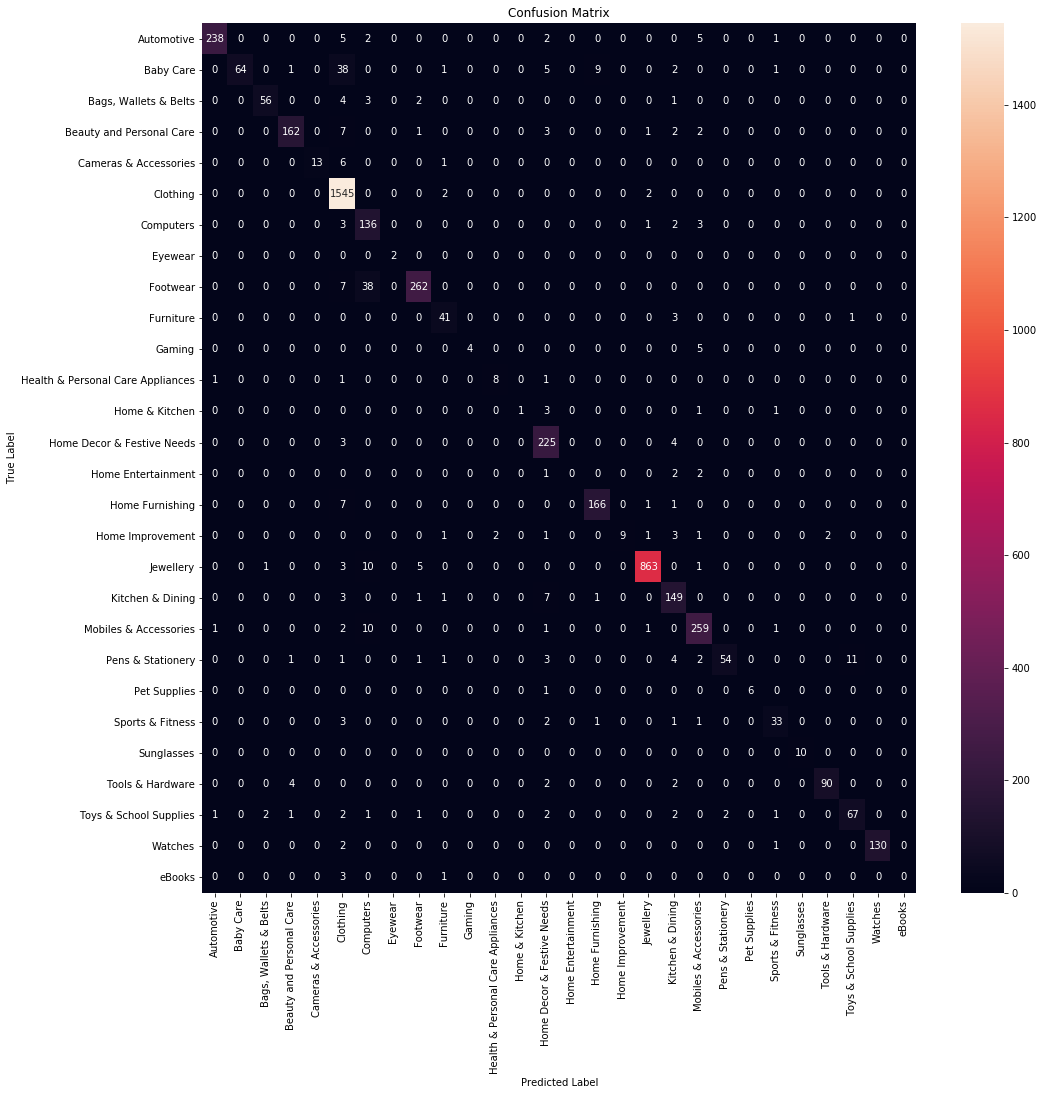

In [243]:
# Confusion Matrix
plt.figure(figsize=(16,16))
import seaborn as sns
conf_mat=confusion_matrix(y_test,predictions)
df_con=pd.DataFrame(conf_mat,index=rf_model.classes_,columns=rf_model.classes_)
sns.heatmap(df_con,annot=True,fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Applying XgBoost on Bow

In [79]:
from xgboost import XGBClassifier


In [258]:
from prettytable import PrettyTable
featurization = ['Bag of Words','Bag of Words','TFIDF','TFIDF weighted word2vec','Bag of Words','TFIDF ','TFIDF weighted word2vec' ]
model=['Logistic Regression (L2)','Logistic Regression(L1)','Logistic Regression (L2)','Logistic Regression (L2)','Random Forest(RF)','Random Forest(RF)','Random Forest(RF)',]

besthyperparameter =[{'alpha =',0.1},{'alpha =',0.0001},{'alpha =',0.0001},{'alpha =',0.0001},
                     {'n_es':80 , 'max_d': 500},
                     {'max_d': None, 'n_es': 60},
                     { 'max_d': 100,  
                      'n_es': 200}]
F1_score= [0.9341,0.9160,0.9691,0.0148,0.9573,0.9342,0.9431]
Hamming_loss=[0.0658,0.0839,0.03050,0.08521,0.0470,0.06589,0.05694,]

# Initializing prettytable
ptable = PrettyTable()

# Adding columns
ptable.add_column("MODEL",featurization)
ptable.add_column("Method",model)
ptable.add_column("Best Hyperparameter",besthyperparameter)
ptable.add_column("f1score",F1_score)
ptable.add_column("Hamming_loss",Hamming_loss)
# Printing the Table
print(ptable)

+-------------------------+--------------------------+-----------------------------+---------+--------------+
|          MODEL          |          Method          |     Best Hyperparameter     | f1score | Hamming_loss |
+-------------------------+--------------------------+-----------------------------+---------+--------------+
|       Bag of Words      | Logistic Regression (L2) |       {0.1, 'alpha ='}      |  0.9341 |    0.0658    |
|       Bag of Words      | Logistic Regression(L1)  |     {0.0001, 'alpha ='}     |  0.916  |    0.0839    |
|          TFIDF          | Logistic Regression (L2) |     {0.0001, 'alpha ='}     |  0.9691 |    0.0305    |
| TFIDF weighted word2vec | Logistic Regression (L2) |     {0.0001, 'alpha ='}     |  0.0148 |   0.08521    |
|       Bag of Words      |    Random Forest(RF)     |  {'n_es': 80, 'max_d': 500} |  0.9573 |    0.047     |
|          TFIDF          |    Random Forest(RF)     | {'max_d': None, 'n_es': 60} |  0.9342 |   0.06589    |
| TFIDF we